# Introduction to ginger loss

This notebook contains:
- [What l1 and l2 losses are](#what-l1-and-l2-losses-are)
- [When they are used for](#when-they-are-used-for)
- [Math behinds it](#math-behinds-it)
- [Lets look at values and gradients](#lets-look-at-values-and-gradients)
- [Simple test on DNN](#simple-test-on-dnn)
- [Ginger loss](#ginger-loss)
- [Fast l1 loss](#fast-l1-loss)
- [Comparison for time series](#comparison-for-time-series)
- [Comparison for reconstruction](#comparison-for-reconstruction)
- [Comparison for reconstruction on images](#comparison-for-reconstruction-on-images)

## What l1 and l2 losses are

## When they are used for

## Math behinds it

## Lets look at values and gradients

In [ ]:
%pip install "jax[cpu]"

Lets import libraries we will be using in this notebook

In [37]:
# Data
import jax
import jax.numpy as jnp
import jax.random as random

# Plotting
import matplotlib.pyplot as plt
%matplotlib inline

Let's generate some data and plot it

In [38]:
seed = 0
dtype = jnp.float32
rng = random.PRNGKey(seed)

In [39]:
x = jnp.linspace(-100, 100, 999, dtype=dtype)
x[:10], x[-10:]

(DeviceArray([-100.      ,  -99.7996  ,  -99.5992  ,  -99.398796,
               -99.1984  ,  -98.99799 ,  -98.79759 ,  -98.59719 ,
               -98.39679 ,  -98.19639 ], dtype=float32),
 DeviceArray([ 98.196396,  98.39679 ,  98.5972  ,  98.79759 ,  98.998   ,
               99.198395,  99.398796,  99.5992  ,  99.7996  , 100.      ],            dtype=float32))

In [40]:
x[499]

DeviceArray(0., dtype=float32)

Now lets calculate l1, l2 and plot them

In [41]:
l1 = jnp.abs(x)
l2 = x**2

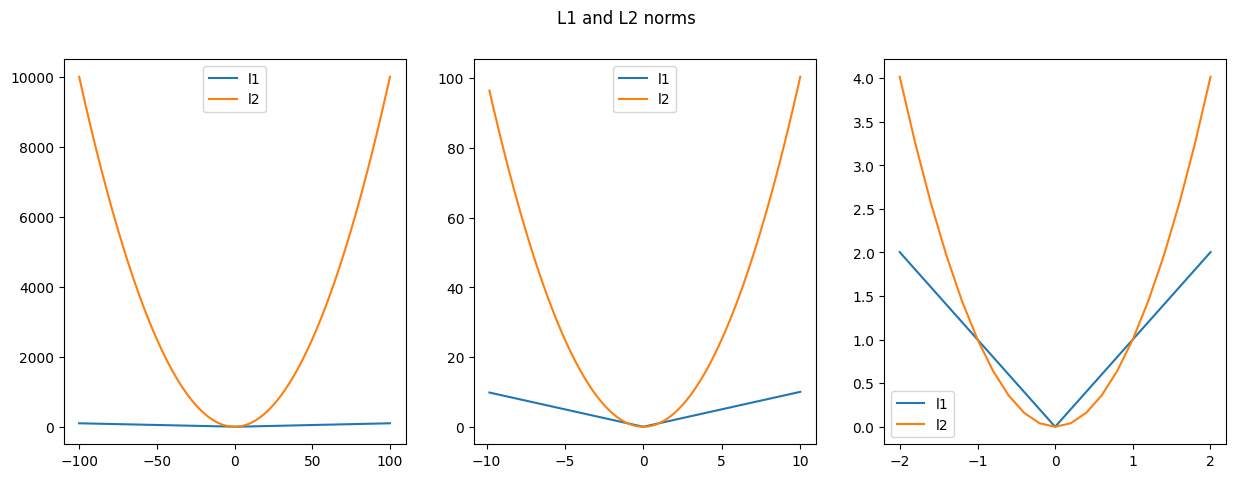

In [42]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].plot(x, l1, label='l1')
axs[0].plot(x, l2, label = "l2")
axs[0].legend()
axs[1].plot(x[450:550], l1[450:550], label='l1')
axs[1].plot(x[450:550], l2[450:550], label='l2')
axs[1].legend()
axs[2].plot(x[489:510], l1[489:510], label='l1')
axs[2].plot(x[489:510], l2[489:510], label='l2')
axs[2].legend()
fig.suptitle("L1 and L2 norms")
plt.show()

In [43]:
l1_grad_fn = jax.grad(lambda x: jnp.abs(x))
l2_grad_fn = jax.grad(lambda x: x**2)
l1_grad = jnp.array([l1_grad_fn(x_i) for x_i in x])
l2_grad = jnp.array([l2_grad_fn(x_i) for x_i in x])

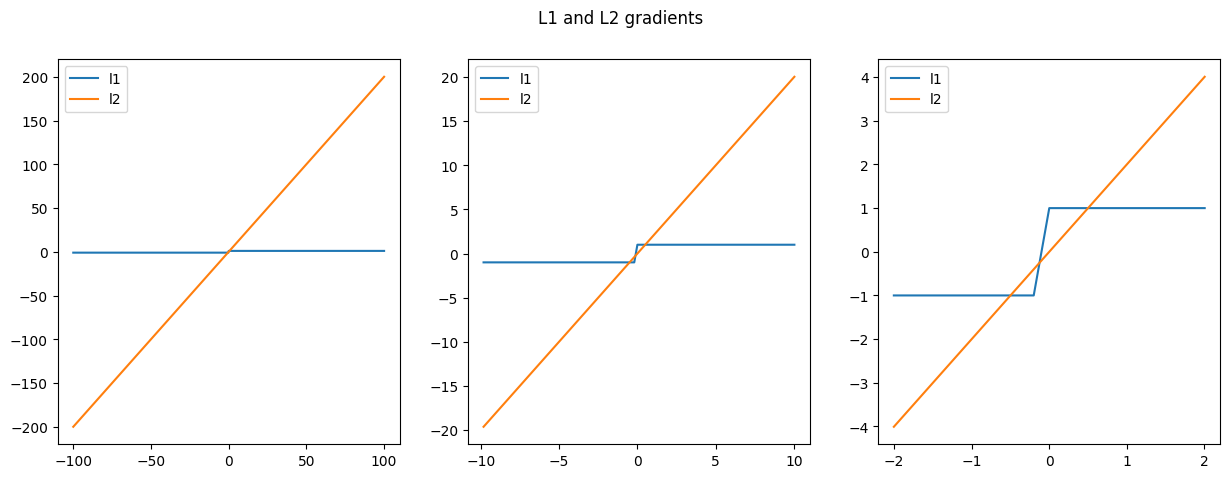

In [44]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].plot(x, l1_grad, label='l1')
axs[0].plot(x, l2_grad, label = "l2")
axs[0].legend()
axs[1].plot(x[450:550], l1_grad[450:550], label='l1')
axs[1].plot(x[450:550], l2_grad[450:550], label='l2')
axs[1].legend()
axs[2].plot(x[489:510], l1_grad[489:510], label='l1')
axs[2].plot(x[489:510], l2_grad[489:510], label='l2')
axs[2].legend()
fig.suptitle("L1 and L2 gradients")
plt.show()

In [45]:
l1_grad[498], l2_grad[498], l1_grad[499], l2_grad[499]

(DeviceArray(-1., dtype=float32),
 DeviceArray(-0.40080404, dtype=float32),
 DeviceArray(1., dtype=float32),
 DeviceArray(0., dtype=float32))

In [46]:
x_small = jnp.linspace(-1, 1, 999, dtype=dtype)
l1_grad_small = jnp.array([l1_grad_fn(x_i) for x_i in x_small])
l2_grad_small = jnp.array([l2_grad_fn(x_i) for x_i in x_small])

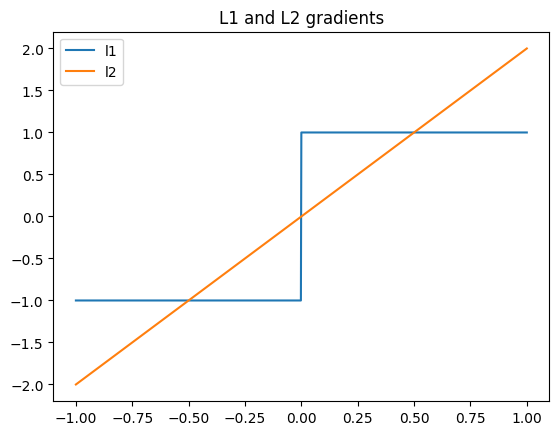

In [47]:
plt.plot(x_small, l1_grad_small, label='l1')
plt.plot(x_small, l2_grad_small, label = "l2")
plt.legend()
plt.title("L1 and L2 gradients")
plt.show()

## Ginger loss

In [78]:
#ginger = jnp.where(l1 > 0.5, l2, l1)
ginger_5 = jnp.where(0.5 < l1, l2 + (1-2*0.5)*l1 + 0.5**2, l1)
ginger_1 = jnp.where(1.0 < l1, l2 + (1-2*1.0)*l1 + 1.0**2, l1)

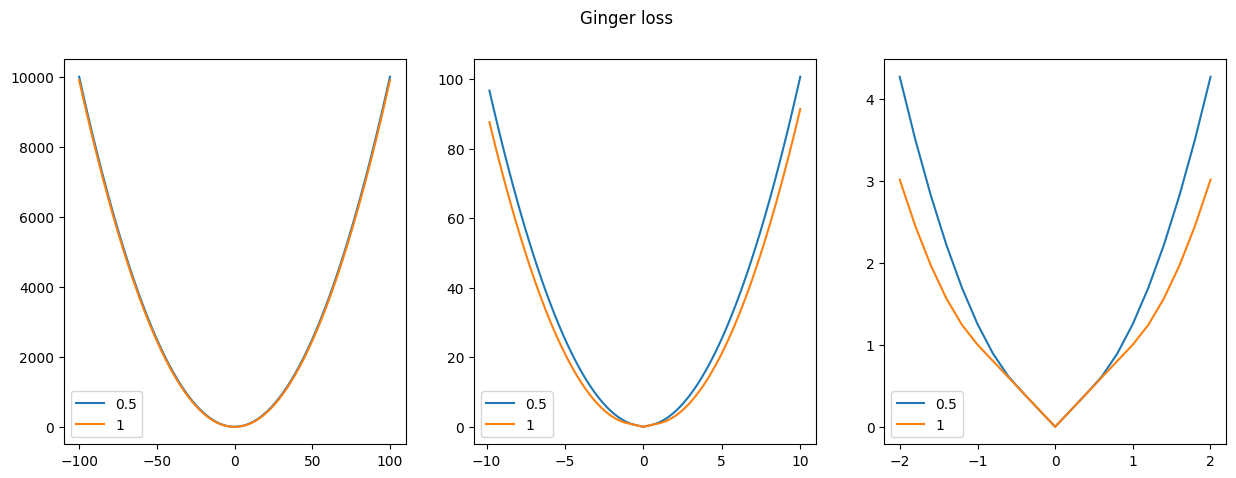

In [79]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].plot(x, ginger_5, label='0.5')
axs[0].plot(x, ginger_1, label = "1")
axs[0].legend()
axs[1].plot(x[450:550], ginger_5[450:550], label='0.5')
axs[1].plot(x[450:550], ginger_1[450:550], label='1')
axs[1].legend()
axs[2].plot(x[489:510], ginger_5[489:510], label='0.5')
axs[2].plot(x[489:510], ginger_1[489:510], label='1')
axs[2].legend()
fig.suptitle("Ginger loss")
plt.show()

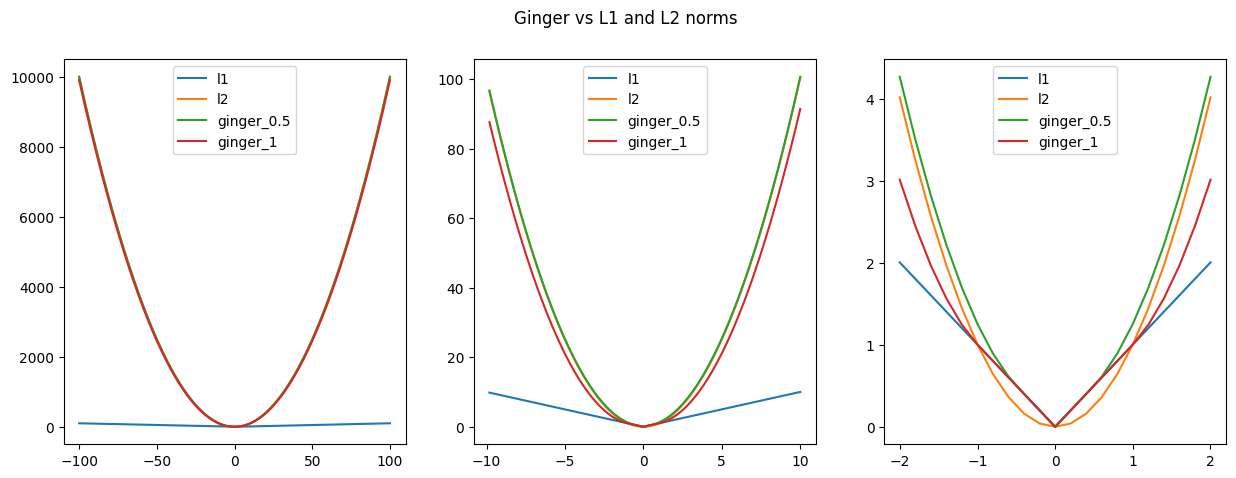

In [80]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].plot(x, l1, label='l1')
axs[0].plot(x, l2, label = "l2")
axs[0].plot(x, ginger_5, label = "ginger_0.5")
axs[0].plot(x, ginger_1, label = "ginger_1")
axs[0].legend()
axs[1].plot(x[450:550], l1[450:550], label='l1')
axs[1].plot(x[450:550], l2[450:550], label='l2')
axs[1].plot(x[450:550], ginger_5[450:550], label='ginger_0.5')
axs[1].plot(x[450:550], ginger_1[450:550], label='ginger_1')
axs[1].legend()
axs[2].plot(x[489:510], l1[489:510], label='l1')
axs[2].plot(x[489:510], l2[489:510], label='l2')
axs[2].plot(x[489:510], ginger_5[489:510], label='ginger_0.5')
axs[2].plot(x[489:510], ginger_1[489:510], label='ginger_1')
axs[2].legend()
fig.suptitle("Ginger vs L1 and L2 norms")
plt.show()

In [81]:
l1_small = jnp.abs(x_small)
l2_small = x_small**2
#ginger_small = jnp.where(l1_small > 0.5, l2_small, l1_small)
ginger_5 = jnp.where(0.5 < l1_small, l2_small + (1-2*0.5)*l1_small + 0.5**2, l1_small)
ginger_1 = jnp.where(1.0 < l1_small, l2_small + (1-2*1.0)*l1_small + 1.0**2, l1_small)

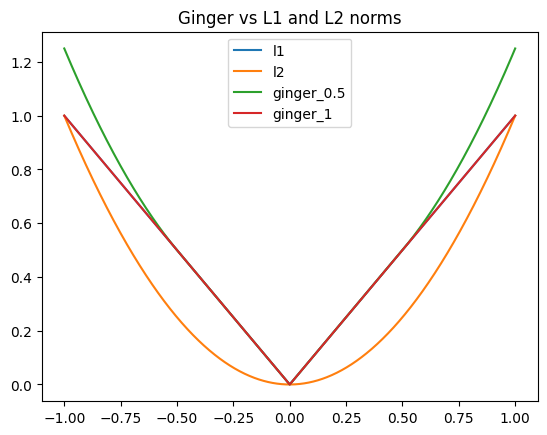

In [82]:
plt.plot(x_small, l1_small, label='l1')
plt.plot(x_small, l2_small, label = "l2")
plt.plot(x_small, ginger_5, label = "ginger_0.5")
plt.plot(x_small, ginger_1, label = "ginger_1")
plt.legend()
plt.title("Ginger vs L1 and L2 norms")
plt.show()

In [83]:
#ginger_grad_fn = jax.grad(lambda x: jnp.where(jnp.abs(x) > 0.5, x**2, jnp.abs(x)))
#ginger_grad = jnp.array([ginger_grad_fn(x_i) for x_i in x])
ginger_grad_fn = jax.grad(lambda x, delta: jnp.where(jnp.abs(x) > delta, x**2 + (1-2*delta)*jnp.abs(x) + delta**2, jnp.abs(x)))
ginger_1_grad = jnp.array([ginger_grad_fn(x_i, 1) for x_i in x])
ginger_5_grad = jnp.array([ginger_grad_fn(x_i, 0.5) for x_i in x])

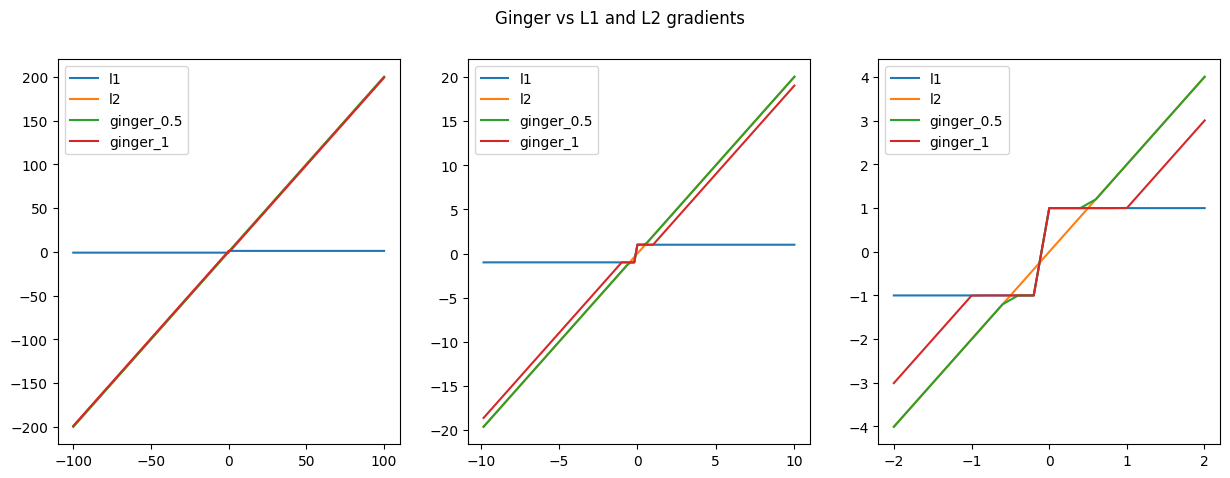

In [84]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].plot(x, l1_grad, label='l1')
axs[0].plot(x, l2_grad, label = "l2")
axs[0].plot(x, ginger_5_grad, label = "ginger_0.5")
axs[0].plot(x, ginger_1_grad, label = "ginger_1")
axs[0].legend()
axs[1].plot(x[450:550], l1_grad[450:550], label='l1')
axs[1].plot(x[450:550], l2_grad[450:550], label='l2')
axs[1].plot(x[450:550], ginger_5_grad[450:550], label='ginger_0.5')
axs[1].plot(x[450:550], ginger_1_grad[450:550], label='ginger_1')
axs[1].legend()
axs[2].plot(x[489:510], l1_grad[489:510], label='l1')
axs[2].plot(x[489:510], l2_grad[489:510], label='l2')
axs[2].plot(x[489:510], ginger_5_grad[489:510], label='ginger_0.5')
axs[2].plot(x[489:510], ginger_1_grad[489:510], label='ginger_1')
axs[2].legend()
fig.suptitle("Ginger vs L1 and L2 gradients")
plt.show()

In [85]:
#ginger_grad_small = jnp.array([ginger_grad_fn(x_i) for x_i in x_small])
ginger_1_grad_small = jnp.array([ginger_grad_fn(x_i, 1) for x_i in x_small])
ginger_5_grad_small = jnp.array([ginger_grad_fn(x_i, 0.5) for x_i in x_small])

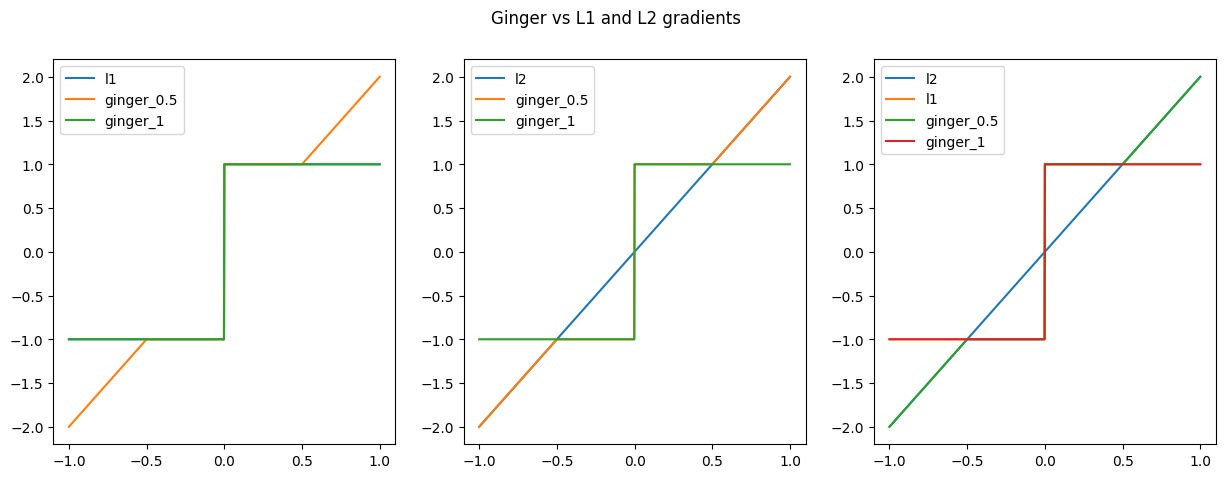

In [86]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].plot(x_small, l1_grad_small, label='l1')
axs[0].plot(x_small, ginger_5_grad_small, label = "ginger_0.5")
axs[0].plot(x_small, ginger_1_grad_small, label = "ginger_1")
axs[0].legend()
axs[1].plot(x_small, l2_grad_small, label='l2')
axs[1].plot(x_small, ginger_5_grad_small, label = "ginger_0.5")
axs[1].plot(x_small, ginger_1_grad_small, label = "ginger_1")
axs[1].legend()
axs[2].plot(x_small, l2_grad_small, label='l2')
axs[2].plot(x_small, l1_grad_small, label='l1')
axs[2].plot(x_small, ginger_5_grad_small, label = "ginger_0.5")
axs[2].plot(x_small, ginger_1_grad_small, label = "ginger_1")
axs[2].legend()
fig.suptitle("Ginger vs L1 and L2 gradients")
plt.show()

## Fast l1 loss

In [87]:
fastl1_1 = jnp.where(1.0 > l1, l1, l2/(2*1.0) + 1.0/2)
fastl1_5 = jnp.where(5.0 > l1, l1, l2/(2*5.0) + 5.0/2)
small_fastl1 = jnp.where(1.0 > l1_small, l1_small, l2_small/(2*1.0) + 1.0/2)
small_fastl5 = jnp.where(5.0 > l1_small, l1_small, l2_small/(2*5.0) + 5.0/2)

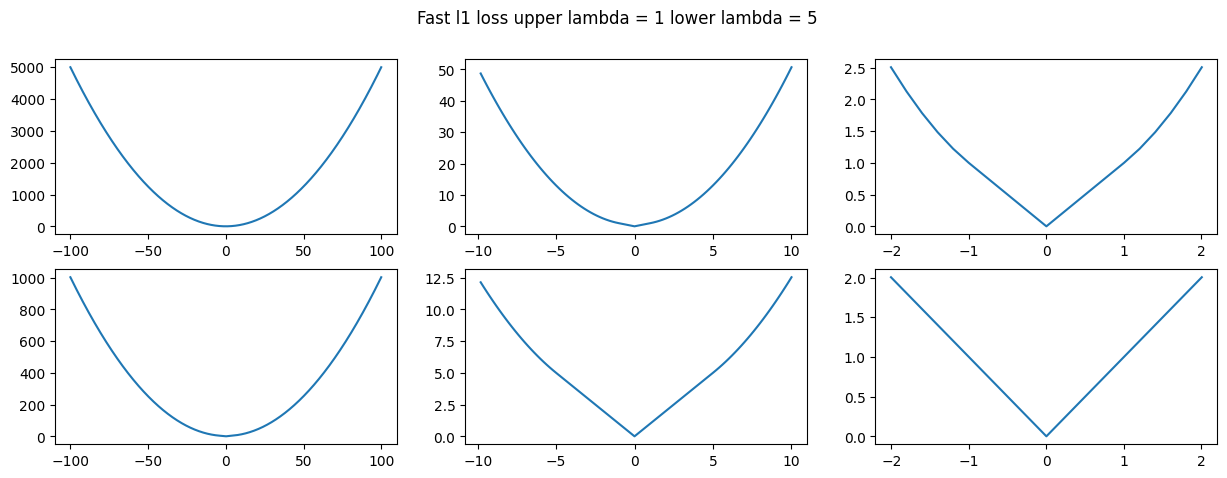

In [88]:
fig, axs = plt.subplots(2, 3, figsize=(15, 5))
axs[0, 0].plot(x, fastl1_1)
axs[0, 1].plot(x[450:550], fastl1_1[450:550])
axs[0, 2].plot(x[489:510], fastl1_1[489:510])
axs[1, 0].plot(x, fastl1_5)
axs[1, 1].plot(x[450:550], fastl1_5[450:550])
axs[1, 2].plot(x[489:510], fastl1_5[489:510])
fig.suptitle("Fast l1 loss upper lambda = 1 lower lambda = 5")
plt.show()

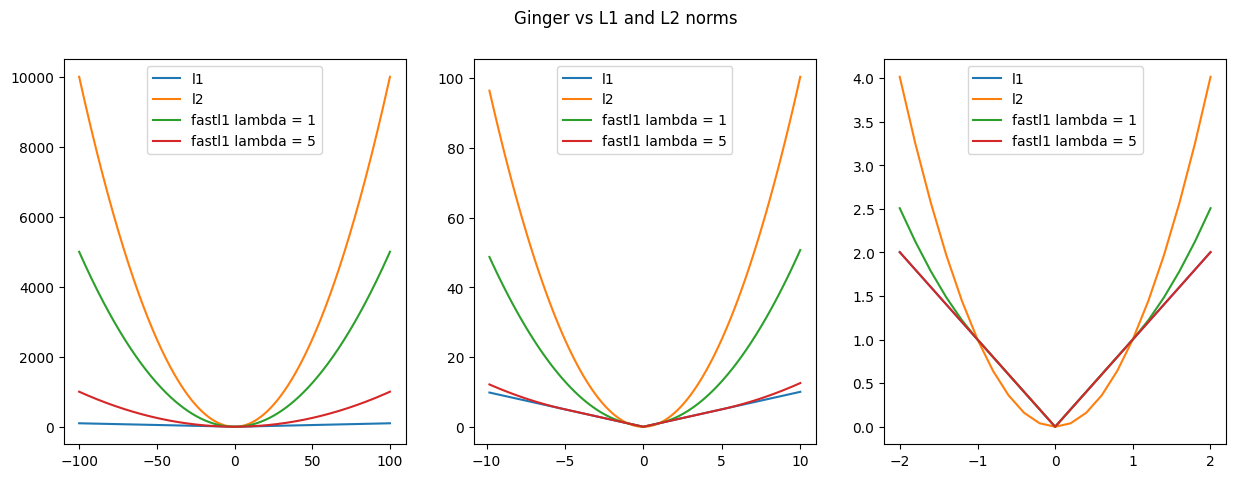

In [89]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].plot(x, l1, label='l1')
axs[0].plot(x, l2, label = "l2")
axs[0].plot(x, fastl1_1, label = "fastl1 lambda = 1")
axs[0].plot(x, fastl1_5, label = "fastl1 lambda = 5")
axs[0].legend()
axs[1].plot(x[450:550], l1[450:550], label='l1')
axs[1].plot(x[450:550], l2[450:550], label='l2')
axs[1].plot(x[450:550], fastl1_1[450:550], label='fastl1 lambda = 1')
axs[1].plot(x[450:550], fastl1_5[450:550], label='fastl1 lambda = 5')
axs[1].legend()
axs[2].plot(x[489:510], l1[489:510], label='l1')
axs[2].plot(x[489:510], l2[489:510], label='l2')
axs[2].plot(x[489:510], fastl1_1[489:510], label='fastl1 lambda = 1')
axs[2].plot(x[489:510], fastl1_5[489:510], label='fastl1 lambda = 5')
axs[2].legend()
fig.suptitle("Ginger vs L1 and L2 norms")
plt.show()

In [90]:
fastl1_grad_fn = jax.grad(lambda x, lamb: jnp.where(lamb >= jnp.abs(x), jnp.abs(x), x**2/(2*lamb) + lamb/2))
fastl1_1_grad = jnp.array([fastl1_grad_fn(x_i, 1.0) for x_i in x])
fastl1_5_grad = jnp.array([fastl1_grad_fn(x_i, 5.0) for x_i in x])

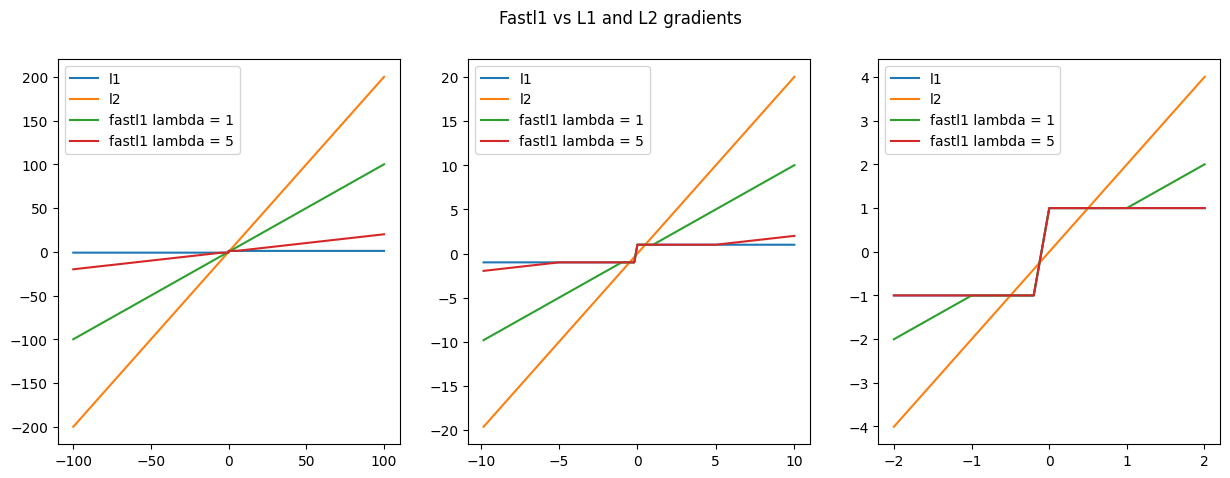

In [91]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].plot(x, l1_grad, label='l1')
axs[0].plot(x, l2_grad, label = "l2")
axs[0].plot(x, fastl1_1_grad, label = "fastl1 lambda = 1")
axs[0].plot(x, fastl1_5_grad, label = "fastl1 lambda = 5")
axs[0].legend()
axs[1].plot(x[450:550], l1_grad[450:550], label='l1')
axs[1].plot(x[450:550], l2_grad[450:550], label='l2')
axs[1].plot(x[450:550], fastl1_1_grad[450:550], label='fastl1 lambda = 1')
axs[1].plot(x[450:550], fastl1_5_grad[450:550], label='fastl1 lambda = 5')
axs[1].legend()
axs[2].plot(x[489:510], l1_grad[489:510], label='l1')
axs[2].plot(x[489:510], l2_grad[489:510], label='l2')
axs[2].plot(x[489:510], fastl1_1_grad[489:510], label='fastl1 lambda = 1')
axs[2].plot(x[489:510], fastl1_5_grad[489:510], label='fastl1 lambda = 5')
axs[2].legend()
fig.suptitle("Fastl1 vs L1 and L2 gradients")
plt.show()

## Simple test on DNN

In [92]:
# Data
rng, key = jax.random.split(rng)
x = jax.random.normal(rng, (1000, 2), dtype=dtype)
y = 5 * x[:, 0] + 3 * x[:, 1] + 1 + jax.random.normal(key, (1000,), dtype=dtype)

In [93]:
# model weights
params = {
    'w': jnp.zeros(x.shape[1:]),
    'b': 0.
}
params

{'w': DeviceArray([0., 0.], dtype=float32), 'b': 0.0}

In [94]:
def forward(params, X):
    return jnp.dot(X, params['w']) + params['b']

def update(params, grads):
    return jax.tree_map(lambda p, g: p - 0.05 * g, params, grads)

def acc(params, X, y):
    return jnp.mean(jnp.abs(forward(params, X) - y))

In [95]:
def loss_fn(params, X, y):
    err = forward(params, X) - y
    return jnp.mean(err**2)  # mse


grad_fn = jax.grad(loss_fn)

1.0195262 0.8057474


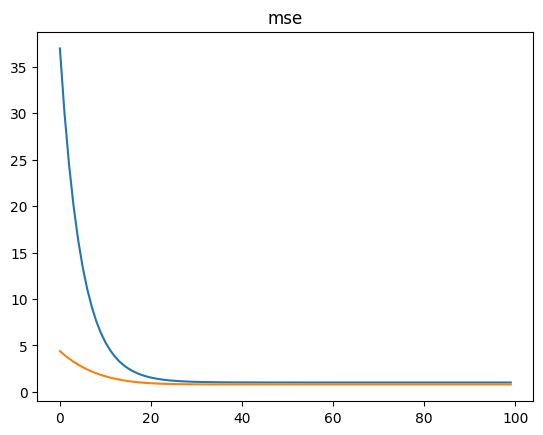

In [96]:
# the main training loop
losses = []
acses = []
for i in range(100):
    loss = loss_fn(params, x, y)
    losses.append(loss)

    grads = grad_fn(params, x, y)
    params = update(params, grads)
    acses.append(acc(params, x, y))
    

print(losses[-1], acses[-1])
plt.plot(range(100), losses, label='loss')
plt.plot(range(100), acses, label='acc')
plt.title("mse")
plt.show()

In [98]:
def loss_fn(params, X, y):
    delta = 0.5
    err = forward(params, X) - y
    return jnp.mean(jnp.where(jnp.abs(err) > delta, err**2 + (1-2*delta)*jnp.abs(err) + delta**2, jnp.abs(err))) # mginger


grad_fn = jax.grad(loss_fn)

1.2387381 0.80523056


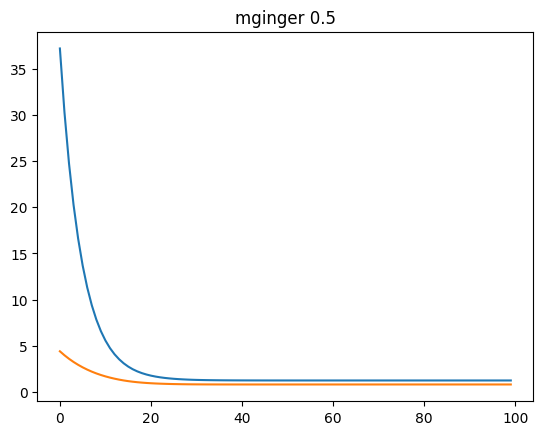

In [99]:
params = {
    'w': jnp.zeros(x.shape[1:]),
    'b': 0.
}

# the main training loop
losses = []
acses = []
for i in range(100):
    loss = loss_fn(params, x, y)
    losses.append(loss)

    grads = grad_fn(params, x, y)
    params = update(params, grads)
    acses.append(acc(params, x, y))
    

print(losses[-1], acses[-1])
plt.plot(range(100), losses, label='loss')
plt.plot(range(100), acses, label='acc')
plt.title("mginger 0.5")
plt.show()

In [101]:
def loss_fn(params, X, y):
    delta = 1.0
    err = forward(params, X) - y
    return jnp.mean(jnp.where(jnp.abs(err) > delta, err**2 + (1-2*delta)*jnp.abs(err) + delta**2, jnp.abs(err))) # mginger


grad_fn = jax.grad(loss_fn)

0.9670444 0.8045075


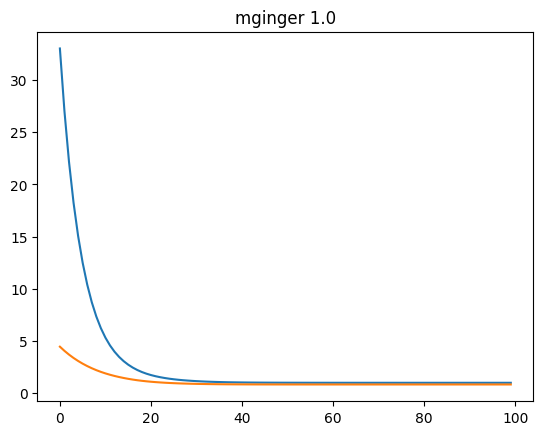

In [102]:
params = {
    'w': jnp.zeros(x.shape[1:]),
    'b': 0.
}

# the main training loop
losses = []
acses = []
for i in range(100):
    loss = loss_fn(params, x, y)
    losses.append(loss)

    grads = grad_fn(params, x, y)
    params = update(params, grads)
    acses.append(acc(params, x, y))
    

print(losses[-1], acses[-1])
plt.plot(range(100), losses, label='loss')
plt.plot(range(100), acses, label='acc')
plt.title("mginger 1.0")
plt.show()

In [35]:
def loss_fn(params, X, y):
    err = forward(params, X) - y
    return jnp.mean(jnp.abs(err))  # mae


grad_fn = jax.grad(loss_fn)

1.8673251 1.8404962


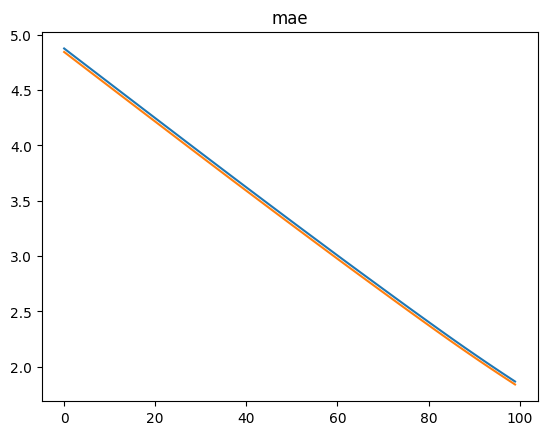

In [36]:
params = {
    'w': jnp.zeros(x.shape[1:]),
    'b': 0.
}

# the main training loop
losses = []
acses = []
for i in range(100):
    loss = loss_fn(params, x, y)
    losses.append(loss)

    grads = grad_fn(params, x, y)
    params = update(params, grads)
    acses.append(acc(params, x, y))
    

print(losses[-1], acses[-1])
plt.plot(range(100), losses, label='loss')
plt.plot(range(100), acses, label='acc')
plt.title("mae")
plt.show()

In [37]:
def loss_fn(params, X, y):
    err = y - forward(params, X)
    return jnp.mean(jnp.abs(err/y))  # mape


grad_fn = jax.grad(loss_fn)

0.88757545 4.286634


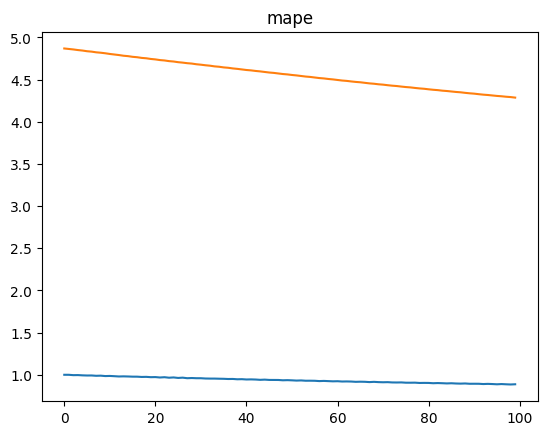

In [38]:
params = {
    'w': jnp.zeros(x.shape[1:]),
    'b': 0.
}

# the main training loop
losses = []
acses = []
for i in range(100):
    loss = loss_fn(params, x, y)
    losses.append(loss)

    grads = grad_fn(params, x, y)
    params = update(params, grads)
    acses.append(acc(params, x, y))
    

print(losses[-1], acses[-1])
plt.plot(range(100), losses, label='loss')
plt.plot(range(100), acses, label='acc')
plt.title("mape")
plt.show()

In [39]:
def loss_fn(params, X, y):
    delta = 1.0
    err = forward(params, X) - y
    abs_error = jnp.abs(err)
    quadratic = jnp.minimum(abs_error, delta)
    linear = jnp.subtract(abs_error, quadratic) # huber loss
    return jnp.mean(
        jnp.add(
            jnp.multiply(0.5, jnp.multiply(quadratic, quadratic)),
            jnp.multiply(delta, linear),
        ),
        axis=-1,
    )

grad_fn = jax.grad(loss_fn)

1.4562995 1.8739982


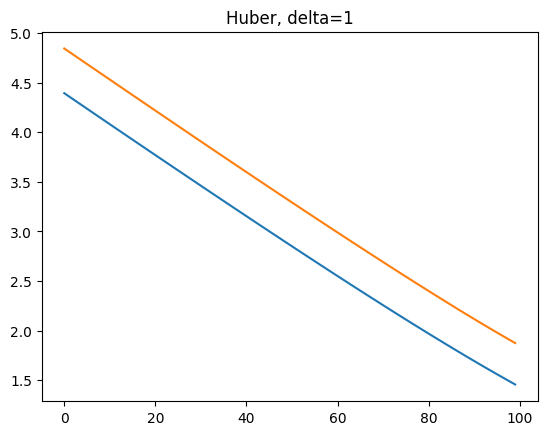

In [40]:
params = {
    'w': jnp.zeros(x.shape[1:]),
    'b': 0.
}

# the main training loop
losses = []
acses = []
for i in range(100):
    loss = loss_fn(params, x, y)
    losses.append(loss)

    grads = grad_fn(params, x, y)
    params = update(params, grads)
    acses.append(acc(params, x, y))
    

print(losses[-1], acses[-1])
plt.plot(range(100), losses, label='loss')
plt.plot(range(100), acses, label='acc')
plt.title("Huber, delta=1")
plt.show()

In [41]:
def loss_fn(params, X, y):
    delta = 0.5
    err = forward(params, X) - y
    abs_error = jnp.abs(err)
    quadratic = jnp.minimum(abs_error, delta)
    linear = jnp.subtract(abs_error, quadratic) # huber loss
    return jnp.mean(
        jnp.add(
            jnp.multiply(0.5, jnp.multiply(quadratic, quadratic)),
            jnp.multiply(delta, linear),
        ),
        axis=-1,
    )

grad_fn = jax.grad(loss_fn)

1.5439395 3.3156846


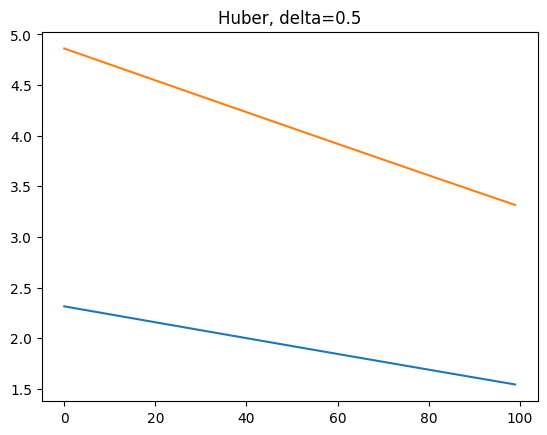

In [42]:
params = {
    'w': jnp.zeros(x.shape[1:]),
    'b': 0.
}

# the main training loop
losses = []
acses = []
for i in range(100):
    loss = loss_fn(params, x, y)
    losses.append(loss)

    grads = grad_fn(params, x, y)
    params = update(params, grads)
    acses.append(acc(params, x, y))
    

print(losses[-1], acses[-1])
plt.plot(range(100), losses, label='loss')
plt.plot(range(100), acses, label='acc')
plt.title("Huber, delta=0.5")
plt.show()

In [43]:
def loss_fn(params, X, y):
    beta = 0.5
    err = forward(params, X) - y
    abs_error = jnp.abs(err) # l1smooth
    return jnp.mean(jnp.where(abs_error < beta, 0.5*(err**2)/beta, abs_error - 0.5*beta))

grad_fn = jax.grad(loss_fn)

1.6394678 1.8481891


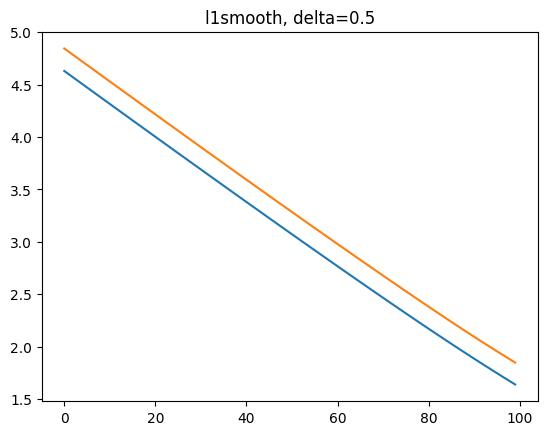

In [44]:
params = {
    'w': jnp.zeros(x.shape[1:]),
    'b': 0.
}

# the main training loop
losses = []
acses = []
for i in range(100):
    loss = loss_fn(params, x, y)
    losses.append(loss)

    grads = grad_fn(params, x, y)
    params = update(params, grads)
    acses.append(acc(params, x, y))
    

print(losses[-1], acses[-1])
plt.plot(range(100), losses, label='loss')
plt.plot(range(100), acses, label='acc')
plt.title("l1smooth, delta=0.5")
plt.show()

In [45]:
def loss_fn(params, X, y):
    beta = 1.0
    err = forward(params, X) - y
    abs_error = jnp.abs(err) # l1smooth
    return jnp.mean(jnp.where(abs_error < beta, 0.5*(err**2)/beta, abs_error - 0.5*beta))

grad_fn = jax.grad(loss_fn)

1.4562995 1.8739982


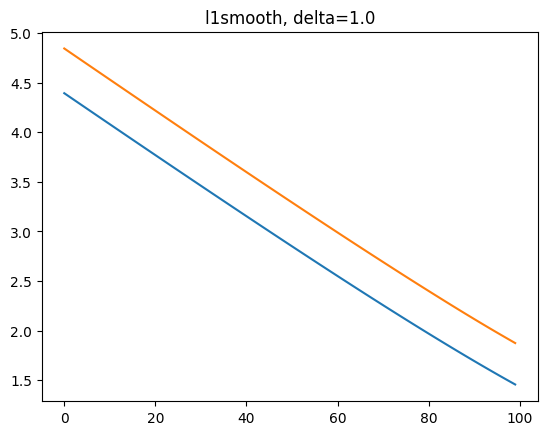

In [46]:
params = {
    'w': jnp.zeros(x.shape[1:]),
    'b': 0.
}

# the main training loop
losses = []
acses = []
for i in range(100):
    loss = loss_fn(params, x, y)
    losses.append(loss)

    grads = grad_fn(params, x, y)
    params = update(params, grads)
    acses.append(acc(params, x, y))
    

print(losses[-1], acses[-1])
plt.plot(range(100), losses, label='loss')
plt.plot(range(100), acses, label='acc')
plt.title("l1smooth, delta=1.0")
plt.show()

In [47]:
def loss_fn(params, X, y):
    beta = 1.0
    err = forward(params, X) - y
    abs_error = jnp.abs(err) # l1fast
    jnp.where(1.0 >= jnp.abs(x), jnp.abs(x), x**2/(2*1.0) + 1.0/2)
    return jnp.mean(jnp.where(beta >= abs_error, abs_error, err**2/(2*beta) + beta/2))

grad_fn = jax.grad(loss_fn)

0.88591313 0.80390126


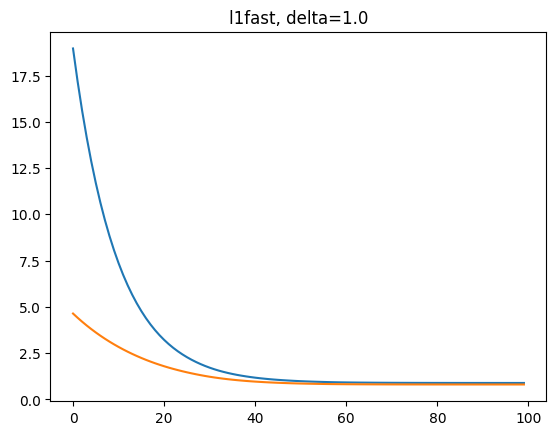

In [48]:
params = {
    'w': jnp.zeros(x.shape[1:]),
    'b': 0.
}

# the main training loop
losses = []
acses = []
for i in range(100):
    loss = loss_fn(params, x, y)
    losses.append(loss)

    grads = grad_fn(params, x, y)
    params = update(params, grads)
    acses.append(acc(params, x, y))
    

print(losses[-1], acses[-1])
plt.plot(range(100), losses, label='loss')
plt.plot(range(100), acses, label='acc')
plt.title("l1fast, delta=1.0")
plt.show()

In [49]:
def loss_fn(params, X, y):
    beta = 3.0
    err = forward(params, X) - y
    abs_error = jnp.abs(err) # l1fast
    jnp.where(1.0 >= jnp.abs(x), jnp.abs(x), x**2/(2*1.0) + 1.0/2)
    return jnp.mean(jnp.where(beta >= abs_error, abs_error, err**2/(2*beta) + beta/2))

grad_fn = jax.grad(loss_fn)

0.9617675 0.9513412


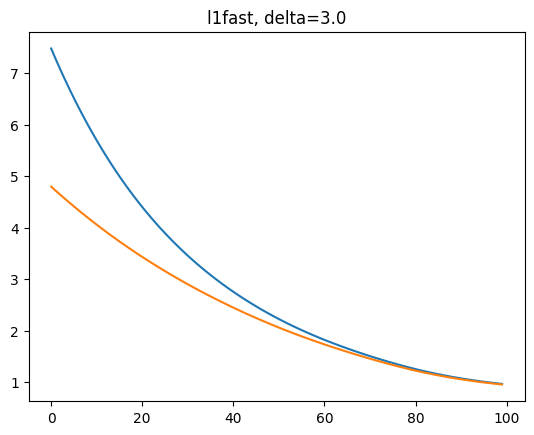

In [50]:
params = {
    'w': jnp.zeros(x.shape[1:]),
    'b': 0.
}

# the main training loop
losses = []
acses = []
for i in range(100):
    loss = loss_fn(params, x, y)
    losses.append(loss)

    grads = grad_fn(params, x, y)
    params = update(params, grads)
    acses.append(acc(params, x, y))
    

print(losses[-1], acses[-1])
plt.plot(range(100), losses, label='loss')
plt.plot(range(100), acses, label='acc')
plt.title("l1fast, delta=3.0")
plt.show()

In [51]:
def loss_fn(params, X, y):
    beta = 5.0
    err = forward(params, X) - y
    abs_error = jnp.abs(err) # l1fast
    jnp.where(1.0 >= jnp.abs(x), jnp.abs(x), x**2/(2*1.0) + 1.0/2)
    return jnp.mean(jnp.where(beta >= abs_error, abs_error, err**2/(2*beta) + beta/2))

grad_fn = jax.grad(loss_fn)

1.382524 1.3594588


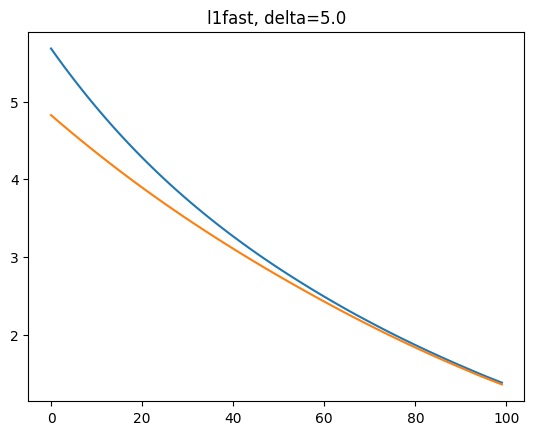

In [52]:
params = {
    'w': jnp.zeros(x.shape[1:]),
    'b': 0.
}

# the main training loop
losses = []
acses = []
for i in range(100):
    loss = loss_fn(params, x, y)
    losses.append(loss)

    grads = grad_fn(params, x, y)
    params = update(params, grads)
    acses.append(acc(params, x, y))
    

print(losses[-1], acses[-1])
plt.plot(range(100), losses, label='loss')
plt.plot(range(100), acses, label='acc')
plt.title("l1fast, delta=5.0")
plt.show()

### Results

| loss fn    | loss value | accuracy (l1) |
|------------|------------|---------------|
| MSE        | 1.020      | 0.806         |
| MAE        | 1.867      | 1.840         |
| Huber(0.5) | 1.544      | 3.316         |
| Huber(1.0) | 1.456      | 1.874         |
| MAPE       | 0.888      | 4.287         |
|MGinger(0.5)| 1.084      | *0.805*       |
|MGinger(1.0)| 0.967      | *0.805*       |
|lsmooth(0.5)| 1.456      | 1.848         |
|lsmooth(1.0)| 1.456      | 1.873         |
| l1fast(1.0)| 0.886      | **0.804**     |
| l1fast(3.0)| 0.962      | 0.951         |
| l1fast(5.0)| 1.383      | 1.359         |
0.9670444 0.8045075

## Comparison for time series

In [53]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

In [54]:
# Data
torch.manual_seed(seed=seed)
np.random.seed(seed=seed)

N = np.random.randint(50, 200) # number of samples
L = np.random.randint(800, 1200) # length of each sample (number of values for each sine wave)
T = np.random.randint(10, 30) # width of the wave
x = np.empty((N,L), np.float32) # instantiate empty array
x[:] = np.arange(L) + np.random.randint(-4*T, 4*T, N).reshape(N,1)
y = np.cos(np.sin(x/1.0/T)**2).astype(np.float32)
future = 1000

In [55]:
train_prop = 0.95
train_samples = round(N * train_prop) 
test_samples = N - train_samples

In [56]:
# y = (N, L)
train_input = torch.from_numpy(y[test_samples:, :-1]) # (train_samples, L-1)
train_target = torch.from_numpy(y[test_samples:, 1:]) # (train_samples, L-1)
test_input = torch.from_numpy(y[:test_samples, :-1]) # (train_samples, L-1)
test_target = torch.from_numpy(y[:test_samples, 1:]) # (train_samples, L-1)

In [57]:
test_input.shape

torch.Size([5, 916])

In [58]:
# Model
class LSTM(nn.Module):
    def __init__(self, hidden_layers=64):
        super(LSTM, self).__init__()
        self.hidden_layers = hidden_layers
        # lstm1, lstm2, linear are all layers in the network
        self.lstm1 = nn.LSTMCell(1, self.hidden_layers)
        self.lstm2 = nn.LSTMCell(self.hidden_layers, self.hidden_layers)
        self.linear = nn.Linear(self.hidden_layers, 1)
        
    def forward(self, y, future_preds=0):
        outputs, n_samples = [], y.size(0)
        h_t = torch.zeros(n_samples, self.hidden_layers, dtype=torch.float32)
        c_t = torch.zeros(n_samples, self.hidden_layers, dtype=torch.float32)
        h_t2 = torch.zeros(n_samples, self.hidden_layers, dtype=torch.float32)
        c_t2 = torch.zeros(n_samples, self.hidden_layers, dtype=torch.float32)
        
        for input_t in y.split(1, dim=1):
            # N, 1
            h_t, c_t = self.lstm1(input_t, (h_t, c_t)) # initial hidden and cell states
            h_t2, c_t2 = self.lstm2(h_t, (h_t2, c_t2)) # new hidden and cell states
            output = self.linear(h_t2) # output from the last FC layer
            outputs.append(output)
            
        for i in range(future_preds):
            # this only generates future predictions if we pass in future_preds>0
            # mirrors the code above, using last output/prediction as input
            h_t, c_t = self.lstm1(output, (h_t, c_t))
            h_t2, c_t2 = self.lstm2(h_t, (h_t2, c_t2))
            output = self.linear(h_t2)
            outputs.append(output)
        # transform list to tensor    
        outputs = torch.cat(outputs, dim=1)
        return outputs

In [59]:
def training_loop(n_epochs, model, optimiser, loss_fn,
                  train_input, train_target, test_input, test_target, future=1000):
    train_loss = []
    test_loss = []
    train_acc = []
    test_acc = []
    for i in range(n_epochs):
        def closure():
            optimiser.zero_grad()
            out = model(train_input)
            loss = loss_fn(out, train_target)
            loss.backward()
            return loss
        optimiser.step(closure)
        with torch.no_grad():
            pred = model(test_input)
            loss = loss_fn(pred, test_target)
            test_loss.append(loss.item())
            test_acc.append(torch.mean(torch.abs(pred-test_target)).item())
            
            # print the loss
            out = model(train_input)
            loss_print = loss_fn(out, train_target)
            train_loss.append(loss_print.item())
            train_acc.append(torch.mean(torch.abs(out-train_target)).item())
            
    return train_loss, test_loss, train_acc, test_acc

0.0001861520140664652 0.00018654493032954633 0.009254938922822475 0.009221430867910385


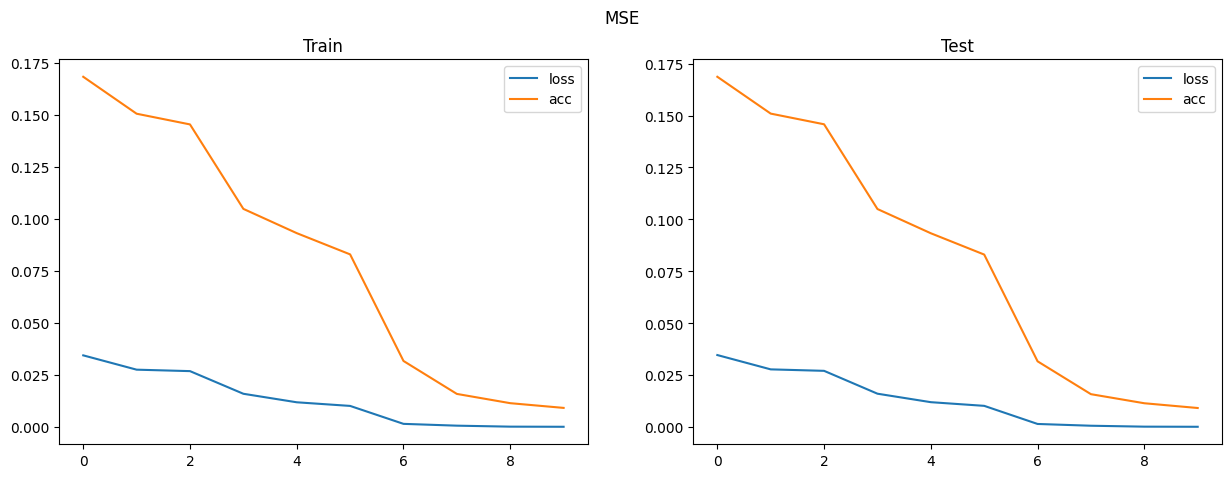

In [60]:
model = LSTM()
criterion = lambda pred, targ: torch.mean((pred - targ)**2)
optimiser = optim.LBFGS(model.parameters(), lr=0.08)

train_loss, test_loss, train_acc, test_acc = training_loop(n_epochs = 10,
              model = model,
              optimiser = optimiser,
              loss_fn = criterion,
              train_input = train_input,
              train_target = train_target,
              test_input = test_input,
              test_target = test_target,
              future=future)

print(train_loss[-1], test_loss[-1], train_acc[-1], test_acc[-1])
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(train_loss, label='loss')
axs[0].plot(train_acc, label='acc')
axs[0].set_title('Train')
axs[0].legend()
axs[1].plot(test_loss, label='loss')
axs[1].plot(test_acc, label='acc')
axs[1].set_title('Test')
axs[1].legend()
fig.suptitle("MSE")
plt.show()

0.0059653958305716515 0.005997137166559696 0.0059653958305716515 0.005997137166559696


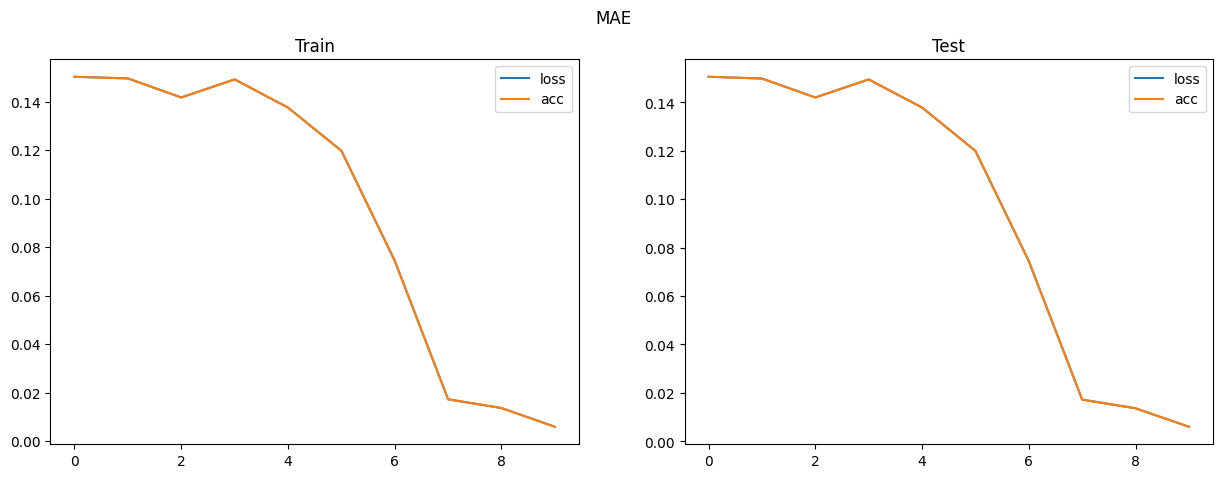

In [61]:
model = LSTM()
criterion = lambda pred, targ: torch.mean(torch.abs(pred - targ))
optimiser = optim.LBFGS(model.parameters(), lr=0.08)

train_loss, test_loss, train_acc, test_acc = training_loop(n_epochs = 10,
              model = model,
              optimiser = optimiser,
              loss_fn = criterion,
              train_input = train_input,
              train_target = train_target,
              test_input = test_input,
              test_target = test_target,
              future=future)

print(train_loss[-1], test_loss[-1], train_acc[-1], test_acc[-1])
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(train_loss, label='loss')
axs[0].plot(train_acc, label='acc')
axs[0].set_title('Train')
axs[0].legend()
axs[1].plot(test_loss, label='loss')
axs[1].plot(test_acc, label='acc')
axs[1].set_title('Test')
axs[1].legend()
fig.suptitle("MAE")
plt.show()

0.005738725885748863 0.005706538446247578 0.0048851436004042625 0.0048966556787490845


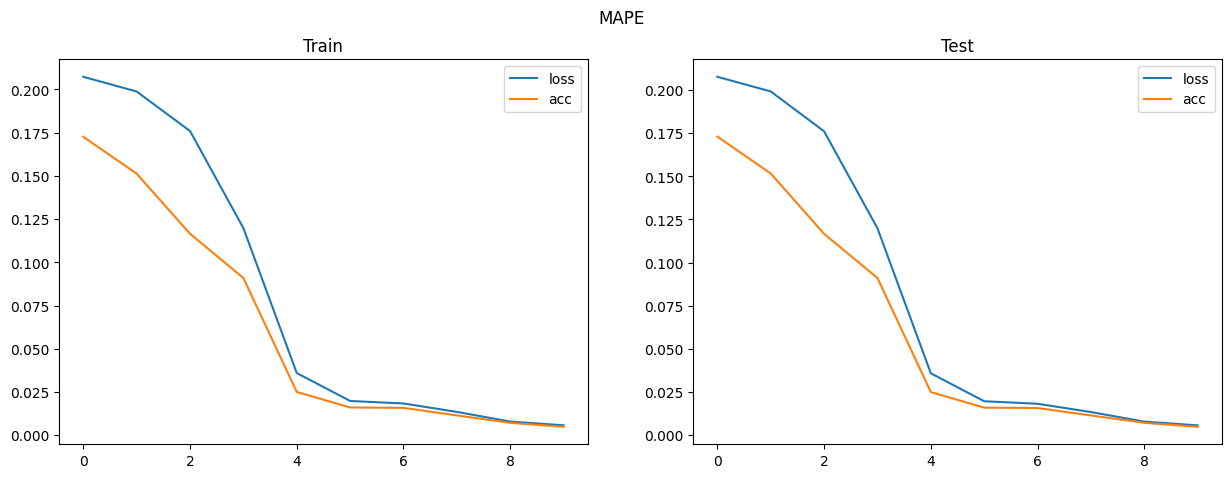

In [62]:
model = LSTM()
criterion = lambda pred, targ: torch.mean(torch.abs((targ - pred)/targ))
optimiser = optim.LBFGS(model.parameters(), lr=0.08)

train_loss, test_loss, train_acc, test_acc = training_loop(n_epochs = 10,
              model = model,
              optimiser = optimiser,
              loss_fn = criterion,
              train_input = train_input,
              train_target = train_target,
              test_input = test_input,
              test_target = test_target,
              future=future)

print(train_loss[-1], test_loss[-1], train_acc[-1], test_acc[-1])
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(train_loss, label='loss')
axs[0].plot(train_acc, label='acc')
axs[0].set_title('Train')
axs[0].legend()
axs[1].plot(test_loss, label='loss')
axs[1].plot(test_acc, label='acc')
axs[1].set_title('Test')
axs[1].legend()
fig.suptitle("MAPE")
plt.show()

0.004162662662565708 0.004196094814687967 0.004162662662565708 0.004196094814687967


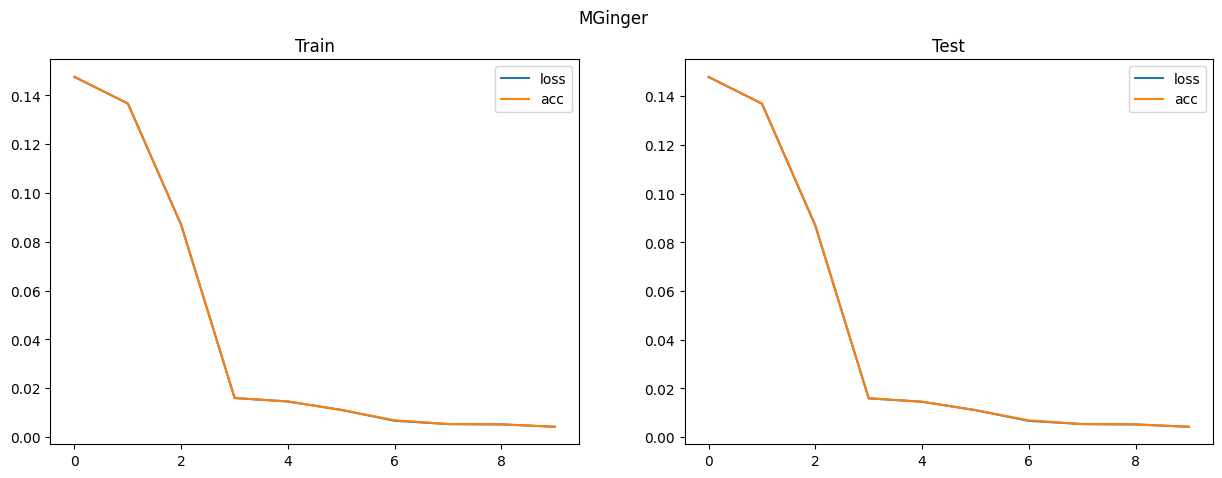

In [63]:
model = LSTM()
criterion = lambda pred, targ: torch.mean(torch.where(torch.abs(pred-targ) > 0.5, (pred-targ)**2, torch.abs(pred-targ)))
optimiser = optim.LBFGS(model.parameters(), lr=0.08)

train_loss, test_loss, train_acc, test_acc = training_loop(n_epochs = 10,
              model = model,
              optimiser = optimiser,
              loss_fn = criterion,
              train_input = train_input,
              train_target = train_target,
              test_input = test_input,
              test_target = test_target,
              future=future)

print(train_loss[-1], test_loss[-1], train_acc[-1], test_acc[-1])
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(train_loss, label='loss')
axs[0].plot(train_acc, label='acc')
axs[0].set_title('Train')
axs[0].legend()
axs[1].plot(test_loss, label='loss')
axs[1].plot(test_acc, label='acc')
axs[1].set_title('Test')
axs[1].legend()
fig.suptitle("MGinger")
plt.show()

0.00011323142098262906 0.00011136890680063516 0.006665423978120089 0.0066604833118617535


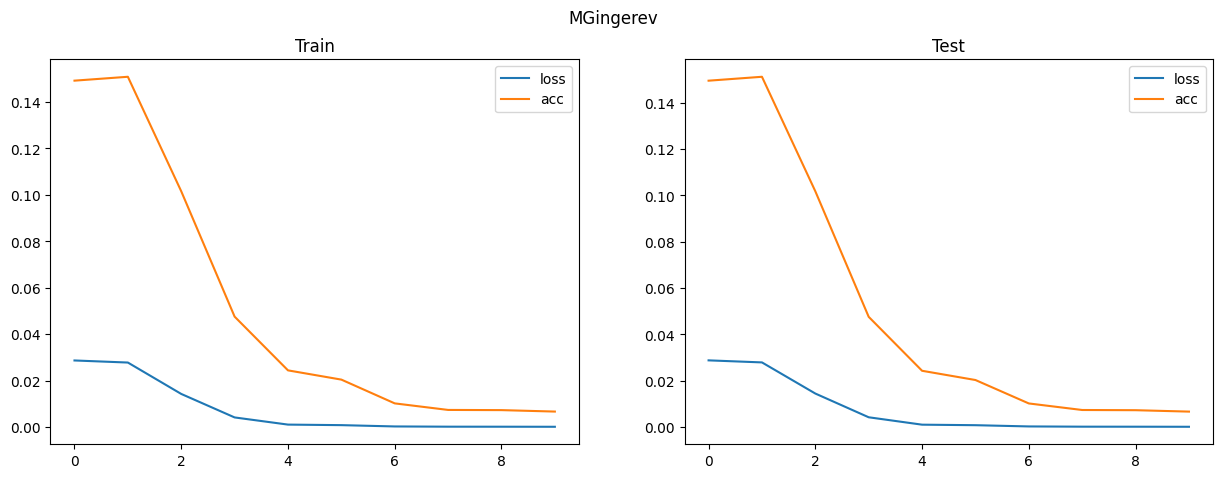

In [64]:
model = LSTM()
criterion = lambda pred, targ: torch.mean(torch.where(torch.abs(pred-targ) < 0.5, (pred-targ)**2, torch.abs(pred-targ)))
optimiser = optim.LBFGS(model.parameters(), lr=0.08)

train_loss, test_loss, train_acc, test_acc = training_loop(n_epochs = 10,
              model = model,
              optimiser = optimiser,
              loss_fn = criterion,
              train_input = train_input,
              train_target = train_target,
              test_input = test_input,
              test_target = test_target,
              future=future)

print(train_loss[-1], test_loss[-1], train_acc[-1], test_acc[-1])
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(train_loss, label='loss')
axs[0].plot(train_acc, label='acc')
axs[0].set_title('Train')
axs[0].legend()
axs[1].plot(test_loss, label='loss')
axs[1].plot(test_acc, label='acc')
axs[1].set_title('Test')
axs[1].legend()
fig.suptitle("MGingerev")
plt.show()

4.2099298298126087e-05 4.1551829781383276e-05 0.00488841300830245 0.004853945691138506


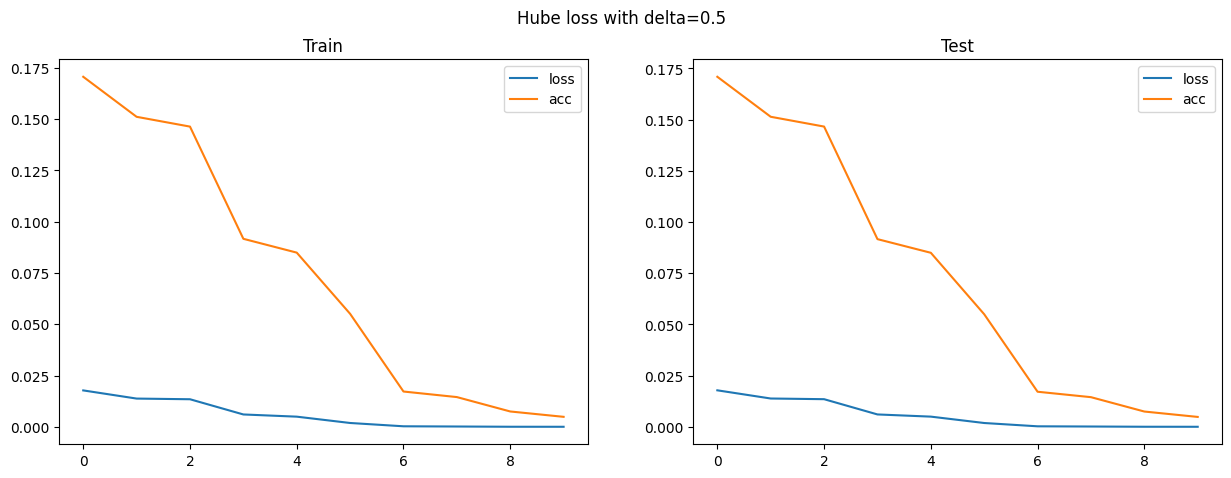

In [65]:
model = LSTM()
criterion = nn.HuberLoss(delta=0.5)
optimiser = optim.LBFGS(model.parameters(), lr=0.08)

train_loss, test_loss, train_acc, test_acc = training_loop(n_epochs = 10,
              model = model,
              optimiser = optimiser,
              loss_fn = criterion,
              train_input = train_input,
              train_target = train_target,
              test_input = test_input,
              test_target = test_target,
              future=future)

print(train_loss[-1], test_loss[-1], train_acc[-1], test_acc[-1])
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(train_loss, label='loss')
axs[0].plot(train_acc, label='acc')
axs[0].set_title('Train')
axs[0].legend()
axs[1].plot(test_loss, label='loss')
axs[1].plot(test_acc, label='acc')
axs[1].set_title('Test')
axs[1].legend()
fig.suptitle("Hube loss with delta=0.5")
plt.show()

0.00041133773629553616 0.0003918613074347377 0.01973915286362171 0.019616900011897087


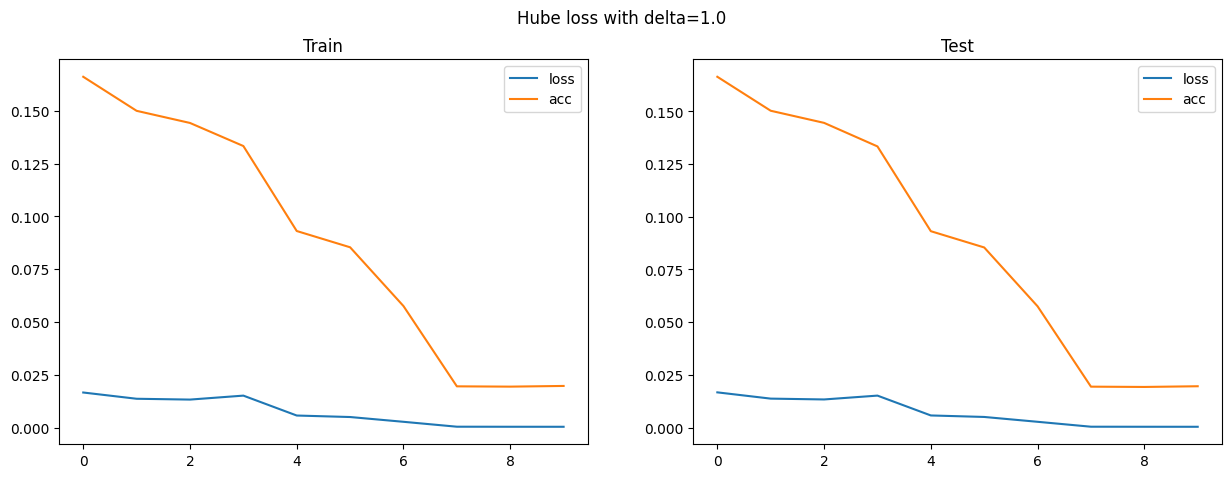

In [66]:
model = LSTM()
criterion = nn.HuberLoss(delta=1.0)
optimiser = optim.LBFGS(model.parameters(), lr=0.08)

train_loss, test_loss, train_acc, test_acc = training_loop(n_epochs = 10,
              model = model,
              optimiser = optimiser,
              loss_fn = criterion,
              train_input = train_input,
              train_target = train_target,
              test_input = test_input,
              test_target = test_target,
              future=future)

print(train_loss[-1], test_loss[-1], train_acc[-1], test_acc[-1])
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(train_loss, label='loss')
axs[0].plot(train_acc, label='acc')
axs[0].set_title('Train')
axs[0].legend()
axs[1].plot(test_loss, label='loss')
axs[1].plot(test_acc, label='acc')
axs[1].set_title('Test')
axs[1].legend()
fig.suptitle("Hube loss with delta=1.0")
plt.show()

6.128164386609569e-05 6.172740540932864e-05 0.006366672459989786 0.006342248525470495


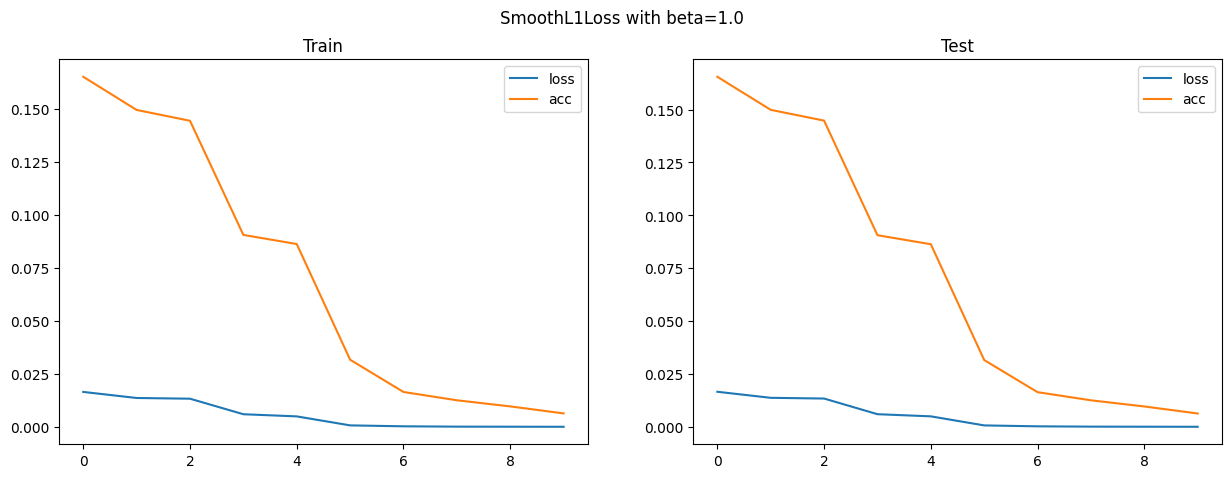

In [67]:
model = LSTM()
criterion = nn.SmoothL1Loss(beta=1.0)
optimiser = optim.LBFGS(model.parameters(), lr=0.08)

train_loss, test_loss, train_acc, test_acc = training_loop(n_epochs = 10,
              model = model,
              optimiser = optimiser,
              loss_fn = criterion,
              train_input = train_input,
              train_target = train_target,
              test_input = test_input,
              test_target = test_target,
              future=future)

print(train_loss[-1], test_loss[-1], train_acc[-1], test_acc[-1])
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(train_loss, label='loss')
axs[0].plot(train_acc, label='acc')
axs[0].set_title('Train')
axs[0].legend()
axs[1].plot(test_loss, label='loss')
axs[1].plot(test_acc, label='acc')
axs[1].set_title('Test')
axs[1].legend()
fig.suptitle("SmoothL1Loss with beta=1.0")
plt.show()

0.00021290905715432018 0.00021318542712833732 0.011165359988808632 0.011144906282424927


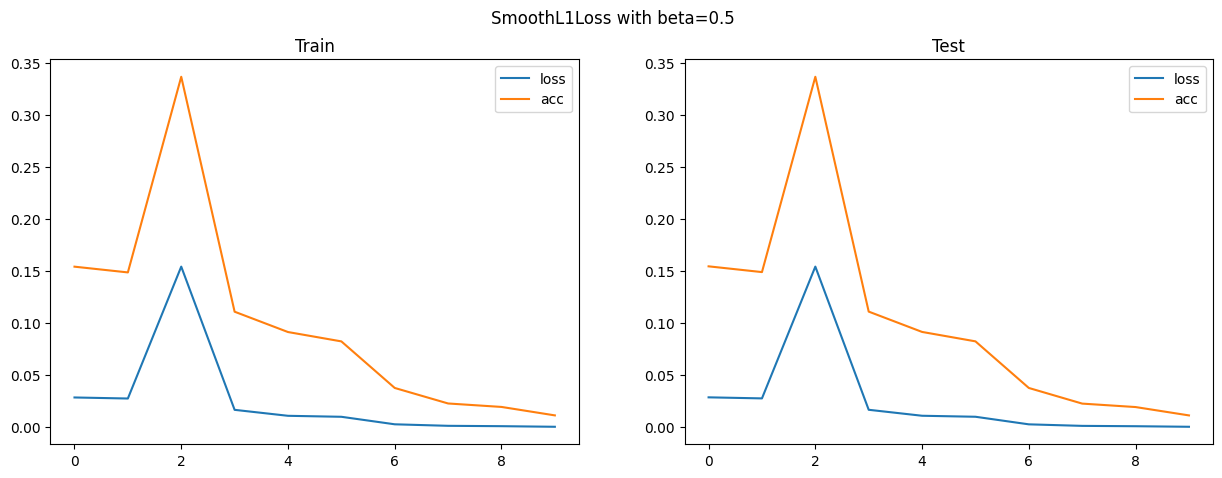

In [68]:
model = LSTM()
criterion = nn.SmoothL1Loss(beta=0.5)
optimiser = optim.LBFGS(model.parameters(), lr=0.08)

train_loss, test_loss, train_acc, test_acc = training_loop(n_epochs = 10,
              model = model,
              optimiser = optimiser,
              loss_fn = criterion,
              train_input = train_input,
              train_target = train_target,
              test_input = test_input,
              test_target = test_target,
              future=future)

print(train_loss[-1], test_loss[-1], train_acc[-1], test_acc[-1])
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(train_loss, label='loss')
axs[0].plot(train_acc, label='acc')
axs[0].set_title('Train')
axs[0].legend()
axs[1].plot(test_loss, label='loss')
axs[1].plot(test_acc, label='acc')
axs[1].set_title('Test')
axs[1].legend()
fig.suptitle("SmoothL1Loss with beta=0.5")
plt.show()

0.005589195527136326 0.005614491645246744 0.005589195527136326 0.005614491645246744


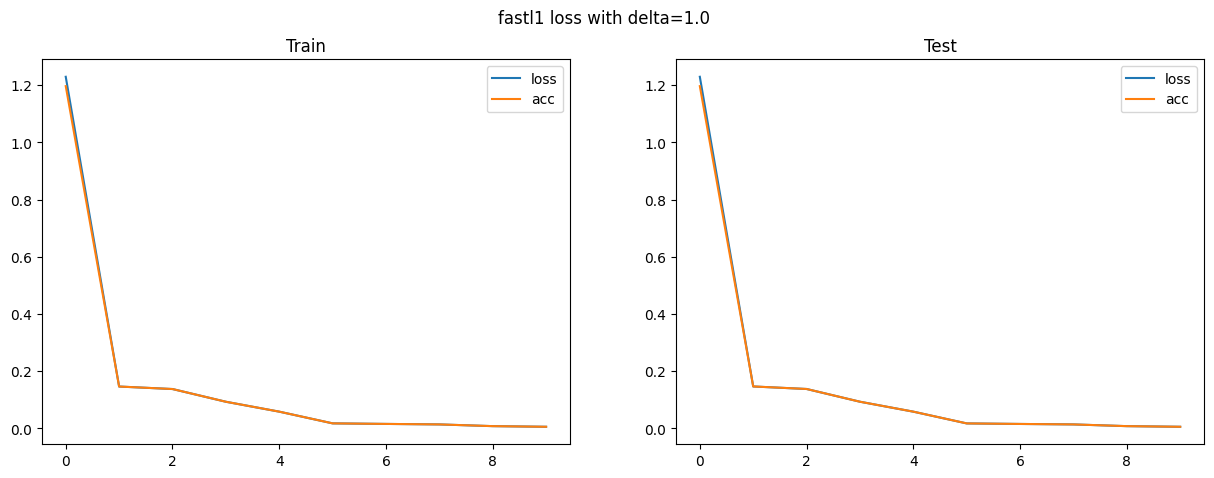

In [69]:
model = LSTM()
criterion = lambda pred, targ: torch.mean(torch.where(1.0 >= torch.abs(pred-targ), torch.abs(pred-targ), (pred-targ)**2/(2*1.0) + 1.0/2))
optimiser = optim.LBFGS(model.parameters(), lr=0.08)

train_loss, test_loss, train_acc, test_acc = training_loop(n_epochs = 10,
              model = model,
              optimiser = optimiser,
              loss_fn = criterion,
              train_input = train_input,
              train_target = train_target,
              test_input = test_input,
              test_target = test_target,
              future=future)

print(train_loss[-1], test_loss[-1], train_acc[-1], test_acc[-1])
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(train_loss, label='loss')
axs[0].plot(train_acc, label='acc')
axs[0].set_title('Train')
axs[0].legend()
axs[1].plot(test_loss, label='loss')
axs[1].plot(test_acc, label='acc')
axs[1].set_title('Test')
axs[1].legend()
fig.suptitle("fastl1 loss with delta=1.0")
plt.show()

0.004812189843505621 0.00486151035875082 0.004812189843505621 0.00486151035875082


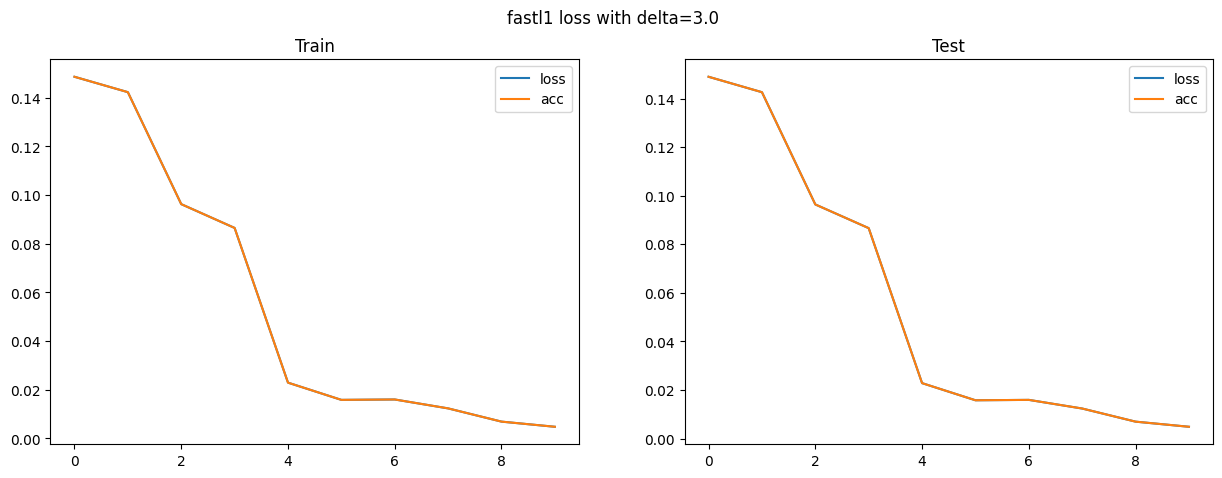

In [70]:
model = LSTM()
criterion = lambda pred, targ: torch.mean(torch.where(3.0 >= torch.abs(pred-targ), torch.abs(pred-targ), (pred-targ)**2/(2*3.0) + 3.0/2))
optimiser = optim.LBFGS(model.parameters(), lr=0.08)

train_loss, test_loss, train_acc, test_acc = training_loop(n_epochs = 10,
              model = model,
              optimiser = optimiser,
              loss_fn = criterion,
              train_input = train_input,
              train_target = train_target,
              test_input = test_input,
              test_target = test_target,
              future=future)

print(train_loss[-1], test_loss[-1], train_acc[-1], test_acc[-1])
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(train_loss, label='loss')
axs[0].plot(train_acc, label='acc')
axs[0].set_title('Train')
axs[0].legend()
axs[1].plot(test_loss, label='loss')
axs[1].plot(test_acc, label='acc')
axs[1].set_title('Test')
axs[1].legend()
fig.suptitle("fastl1 loss with delta=3.0")
plt.show()

0.004359906539320946 0.004370706155896187 0.004359906539320946 0.004370706155896187


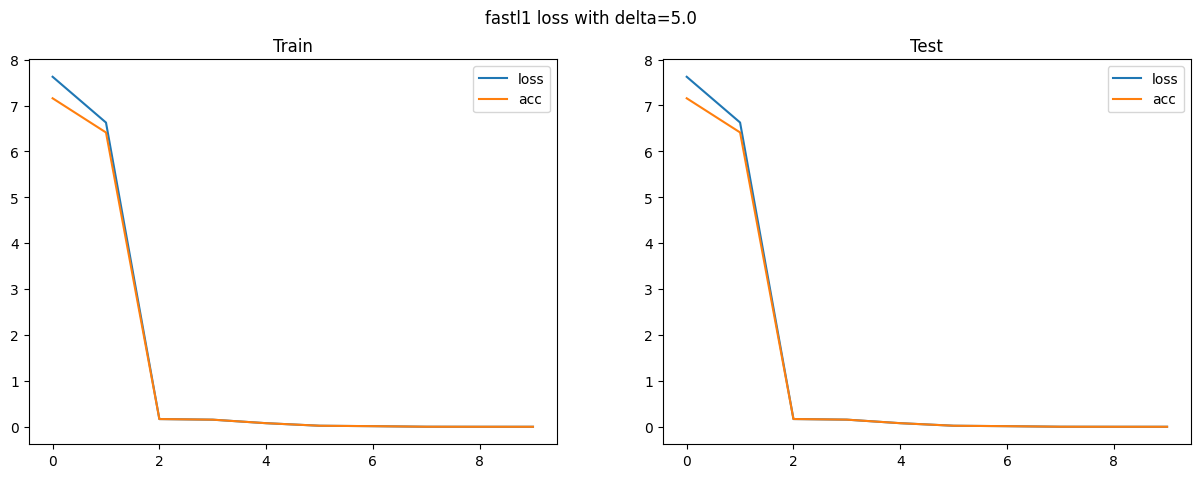

In [71]:
model = LSTM()
criterion = lambda pred, targ: torch.mean(torch.where(5.0 >= torch.abs(pred-targ), torch.abs(pred-targ), (pred-targ)**2/(2*5.0) + 5.0/2))
optimiser = optim.LBFGS(model.parameters(), lr=0.08)

train_loss, test_loss, train_acc, test_acc = training_loop(n_epochs = 10,
              model = model,
              optimiser = optimiser,
              loss_fn = criterion,
              train_input = train_input,
              train_target = train_target,
              test_input = test_input,
              test_target = test_target,
              future=future)

print(train_loss[-1], test_loss[-1], train_acc[-1], test_acc[-1])
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(train_loss, label='loss')
axs[0].plot(train_acc, label='acc')
axs[0].set_title('Train')
axs[0].legend()
axs[1].plot(test_loss, label='loss')
axs[1].plot(test_acc, label='acc')
axs[1].set_title('Test')
axs[1].legend()
fig.suptitle("fastl1 loss with delta=5.0")
plt.show()

### Results

| loss fn    | train loss | acc train (l1)| test loss  | acc test (l1) |
|------------|------------|---------------|------------|---------------|
| MSE        | 1.020      | 0.806         | 1.020      | 1.020         |
| MAE        | 1.867      | 1.840         | 1.020      | 1.020         |
| Huber(0.5) | 1.544      | 3.316         | 1.020      | 1.020         |
| Huber(1.0) | 1.456      | 1.874         | 1.020      | 1.020         |
| MAPE       | 0.888      | 4.287         | 1.020      | 1.020         |
| MGinger    | 1.084      | *0.805*       | 1.020      | 1.020         |
| MGingerev  | 1.846      | 1.848         | 1.020      | 1.020         |
|lsmooth(0.5)| 1.456      | 1.848         | 1.020      | 1.020         |
|lsmooth(1.0)| 1.456      | 1.873         | 1.020      | 1.020         |
| l1fast(1.0)| 0.886      | **0.804**     | 1.020      | 1.020         |
| l1fast(3.0)| 0.962      | 0.951         | 1.020      | 1.020         |
| l1fast(5.0)| 1.383      | 1.359         | 1.020      | 1.020         |

## Comparison for reconstruction

In [72]:
N = 256 # number of samples
train_size, test_size = 20, 5
data = np.random.normal(0, 1, (train_size+test_size, N))
train_input = torch.from_numpy(data[:train_size]) # (train_samples, L-1)
test_input = torch.from_numpy(data[train_size:]) # (train_samples, L-1)
train_input =train_input.type(torch.float32)
test_input =test_input.type(torch.float32)

In [73]:
class VariationalEncoder(nn.Module):
    def __init__(self, latent_dims):
        super(VariationalEncoder, self).__init__()
        self.linear1 = nn.Linear(N, latent_dims)
        self.linear2 = nn.Linear(N, latent_dims)

        self.N = torch.distributions.Normal(0, 1)
        self.kl = 0

    def forward(self, x):
        mu =  self.linear1(x)
        sigma = torch.exp(self.linear2(x))
        z = mu + sigma*self.N.sample(mu.shape)
        self.kl = (sigma**2 + mu**2 - torch.log(sigma) - 1/2).sum()
        return z

In [74]:
class Decoder(nn.Module):
    def __init__(self, latent_dims):
        super(Decoder, self).__init__()
        self.linear = nn.Linear(latent_dims, N)

    def forward(self, z):
        z = torch.sigmoid(self.linear(z))
        return z

In [75]:
class VariationalAutoencoder(nn.Module):
    def __init__(self, latent_dims):
        super(VariationalAutoencoder, self).__init__()
        self.encoder = VariationalEncoder(latent_dims)
        self.decoder = Decoder(latent_dims)

    def forward(self, x):
        z = self.encoder(x)
        return self.decoder(z)

In [76]:
def training_loop(n_epochs, model, optimiser, loss_fn,
                  train_input, test_input):
    train_loss = []
    test_loss = []
    train_acc = []
    test_acc = []
    for i in range(n_epochs):
        def closure():
            optimiser.zero_grad()
            out = model(train_input)
            loss = loss_fn(out, train_input) + model.encoder.kl
            loss.backward()
            return loss
        optimiser.step(closure)
        with torch.no_grad():
            pred = model(test_input)
            loss = loss_fn(pred, test_input)
            test_loss.append(loss.item())
            test_acc.append(torch.mean(torch.abs(pred-test_input)).item())
            
            # print the loss
            out = model(train_input)
            loss_print = loss_fn(out, train_input)
            train_loss.append(loss_print.item())
            train_acc.append(torch.mean(torch.abs(out-train_input)).item())
            
    return train_loss, test_loss, train_acc, test_acc

0.9777014851570129 1.0802223682403564 0.7866929769515991 0.8221921920776367


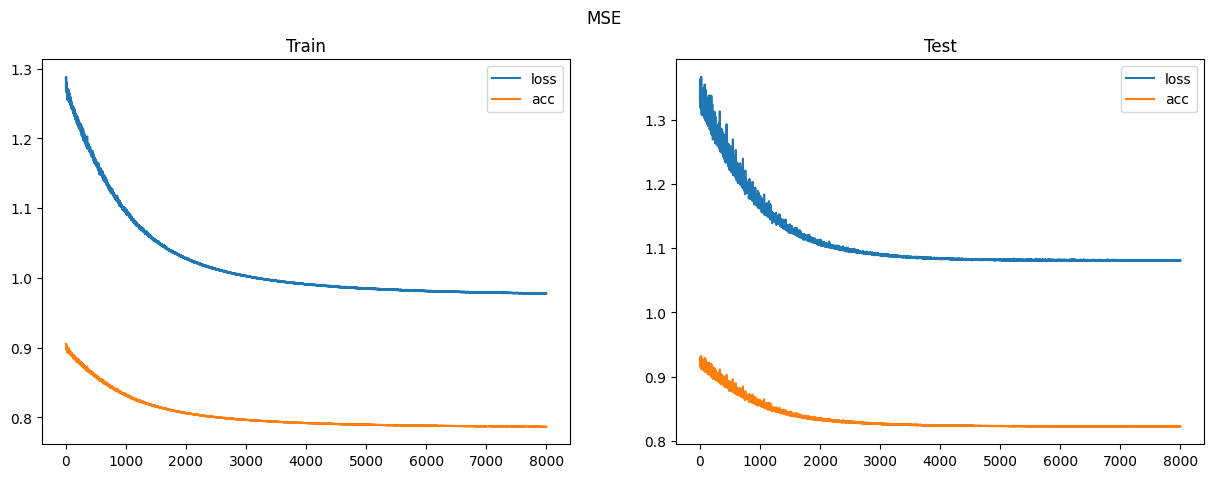

In [77]:
model = VariationalAutoencoder(2)
criterion = lambda pred, targ: torch.mean((pred - targ)**2)
optimiser = torch.optim.Adam(model.parameters())

train_loss, test_loss, train_acc, test_acc = training_loop(n_epochs = 8000,
              model = model,
              optimiser = optimiser,
              loss_fn = criterion,
              train_input = train_input,
              test_input = test_input)

print(train_loss[-1], test_loss[-1], train_acc[-1], test_acc[-1])
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(train_loss, label='loss')
axs[0].plot(train_acc, label='acc')
axs[0].set_title('Train')
axs[0].legend()
axs[1].plot(test_loss, label='loss')
axs[1].plot(test_acc, label='acc')
axs[1].set_title('Test')
axs[1].legend()
fig.suptitle("MSE")
plt.show()

0.7810718417167664 0.8318769335746765 0.7810718417167664 0.8318769335746765


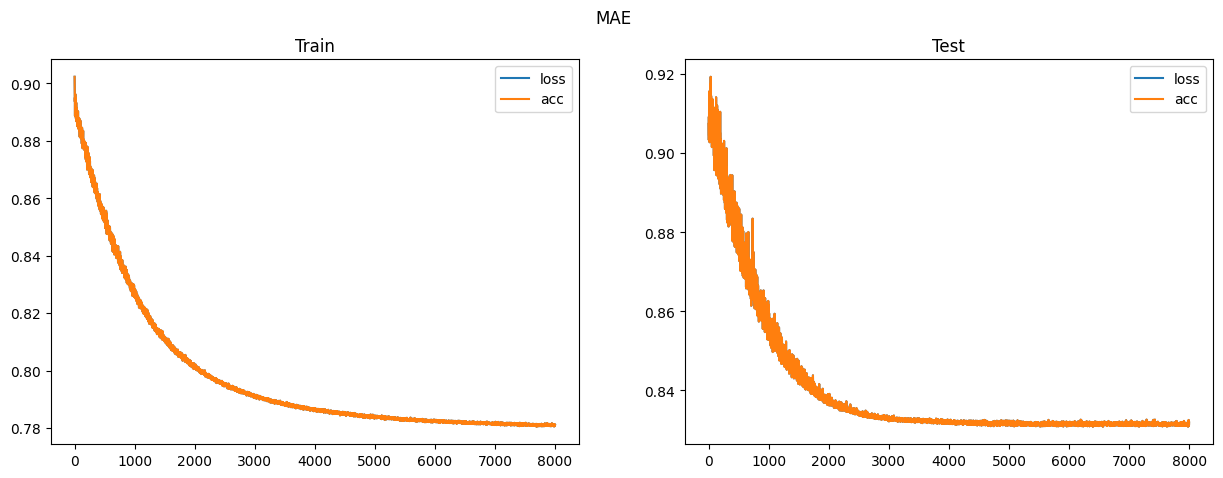

In [78]:
model = VariationalAutoencoder(2)
criterion = lambda pred, targ: torch.mean(torch.abs(pred - targ))
optimiser = torch.optim.Adam(model.parameters())

train_loss, test_loss, train_acc, test_acc = training_loop(n_epochs = 8000,
              model = model,
              optimiser = optimiser,
              loss_fn = criterion,
              train_input = train_input,
              test_input = test_input)

print(train_loss[-1], test_loss[-1], train_acc[-1], test_acc[-1])
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(train_loss, label='loss')
axs[0].plot(train_acc, label='acc')
axs[0].set_title('Train')
axs[0].legend()
axs[1].plot(test_loss, label='loss')
axs[1].plot(test_acc, label='acc')
axs[1].set_title('Test')
axs[1].legend()
fig.suptitle("MAE")
plt.show()

1.1101014614105225 1.3137085437774658 0.7915903329849243 0.8169347643852234


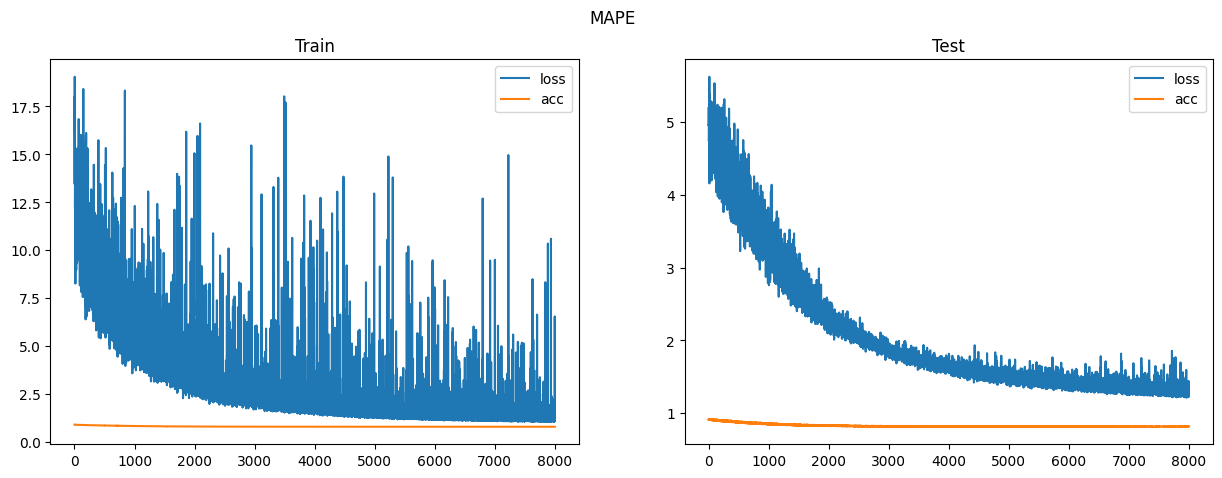

In [79]:
model = VariationalAutoencoder(2)
criterion = lambda pred, targ: torch.mean(torch.abs((targ - pred)/targ))
optimiser = torch.optim.Adam(model.parameters())

train_loss, test_loss, train_acc, test_acc = training_loop(n_epochs = 8000,
              model = model,
              optimiser = optimiser,
              loss_fn = criterion,
              train_input = train_input,
              test_input = test_input)

print(train_loss[-1], test_loss[-1], train_acc[-1], test_acc[-1])
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(train_loss, label='loss')
axs[0].plot(train_acc, label='acc')
axs[0].set_title('Train')
axs[0].legend()
axs[1].plot(test_loss, label='loss')
axs[1].plot(test_acc, label='acc')
axs[1].set_title('Test')
axs[1].legend()
fig.suptitle("MAPE")
plt.show()

1.0414302349090576 1.1384116411209106 0.7847645282745361 0.8209272623062134


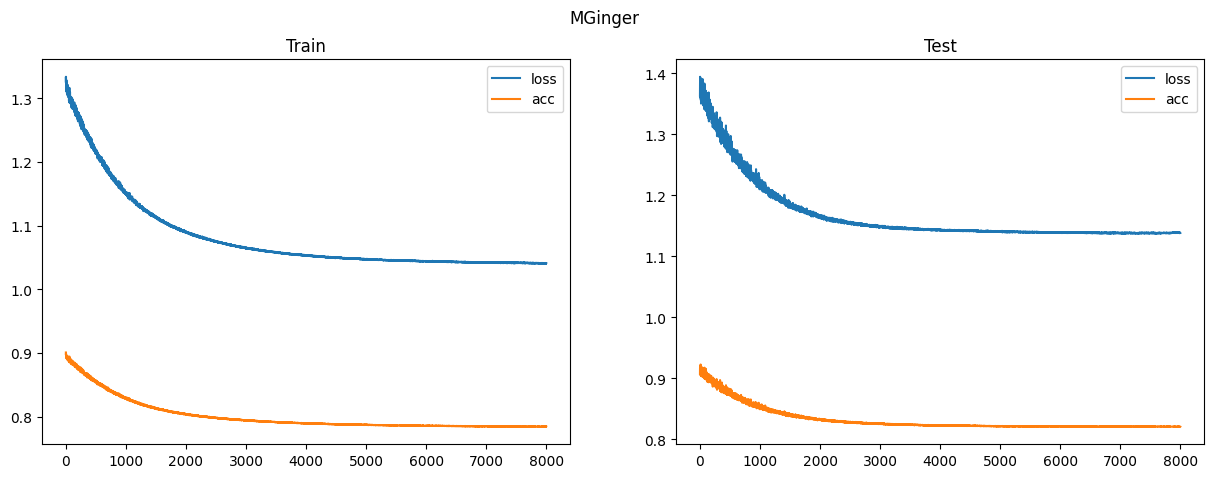

In [80]:
model = VariationalAutoencoder(2)
criterion = lambda pred, targ: torch.mean(torch.where(torch.abs(pred-targ) > 0.5, (pred-targ)**2, torch.abs(pred-targ)))
optimiser = torch.optim.Adam(model.parameters())

train_loss, test_loss, train_acc, test_acc = training_loop(n_epochs = 8000,
              model = model,
              optimiser = optimiser,
              loss_fn = criterion,
              train_input = train_input,
              test_input = test_input)

print(train_loss[-1], test_loss[-1], train_acc[-1], test_acc[-1])
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(train_loss, label='loss')
axs[0].plot(train_acc, label='acc')
axs[0].set_title('Train')
axs[0].legend()
axs[1].plot(test_loss, label='loss')
axs[1].plot(test_acc, label='acc')
axs[1].set_title('Test')
axs[1].legend()
fig.suptitle("MGinger")
plt.show()

0.7166409492492676 0.7674286961555481 0.782844603061676 0.8276959657669067


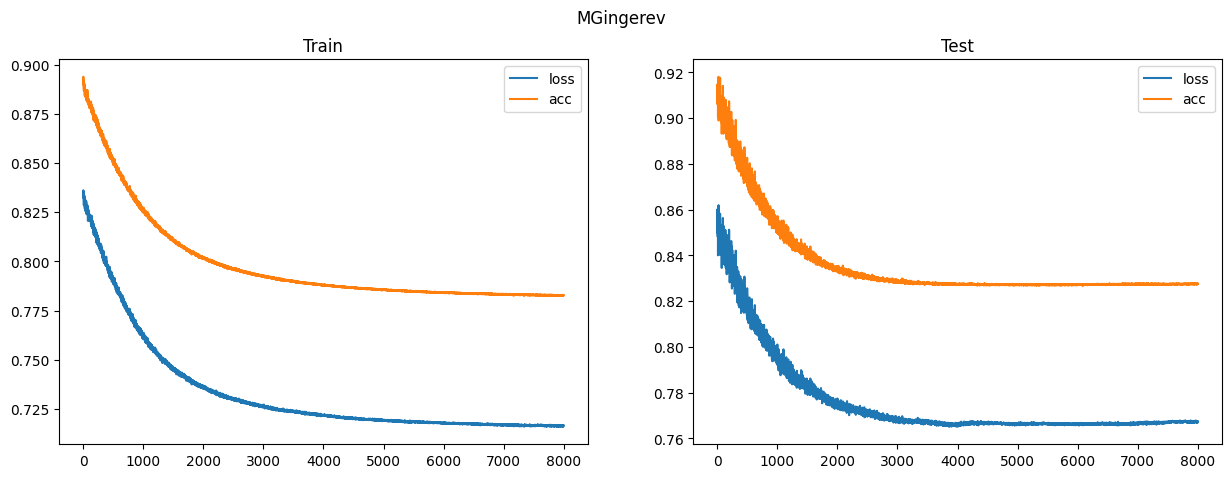

In [81]:
model = VariationalAutoencoder(2)
criterion = lambda pred, targ: torch.mean(torch.where(torch.abs(pred-targ) < 0.5, (pred-targ)**2, torch.abs(pred-targ)))
optimiser = torch.optim.Adam(model.parameters())

train_loss, test_loss, train_acc, test_acc = training_loop(n_epochs = 8000,
              model = model,
              optimiser = optimiser,
              loss_fn = criterion,
              train_input = train_input,
              test_input = test_input)

print(train_loss[-1], test_loss[-1], train_acc[-1], test_acc[-1])
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(train_loss, label='loss')
axs[0].plot(train_acc, label='acc')
axs[0].set_title('Train')
axs[0].legend()
axs[1].plot(test_loss, label='loss')
axs[1].plot(test_acc, label='acc')
axs[1].set_title('Test')
axs[1].legend()
fig.suptitle("MGingerev")
plt.show()

0.2838042974472046 0.3053324818611145 0.782448410987854 0.8271299600601196


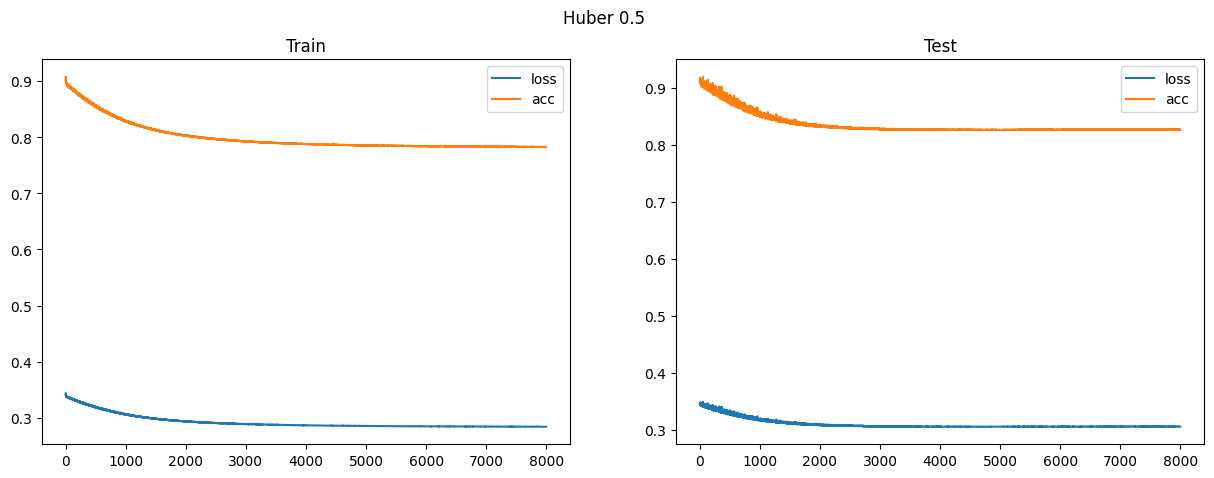

In [82]:
model = VariationalAutoencoder(2)
criterion = nn.HuberLoss(delta=0.5)
optimiser = torch.optim.Adam(model.parameters())

train_loss, test_loss, train_acc, test_acc = training_loop(n_epochs = 8000,
              model = model,
              optimiser = optimiser,
              loss_fn = criterion,
              train_input = train_input,
              test_input = test_input)

print(train_loss[-1], test_loss[-1], train_acc[-1], test_acc[-1])
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(train_loss, label='loss')
axs[0].plot(train_acc, label='acc')
axs[0].set_title('Train')
axs[0].legend()
axs[1].plot(test_loss, label='loss')
axs[1].plot(test_acc, label='acc')
axs[1].set_title('Test')
axs[1].legend()
fig.suptitle("Huber 0.5")
plt.show()

0.4152604043483734 0.451709121465683 0.7844942808151245 0.8254100680351257


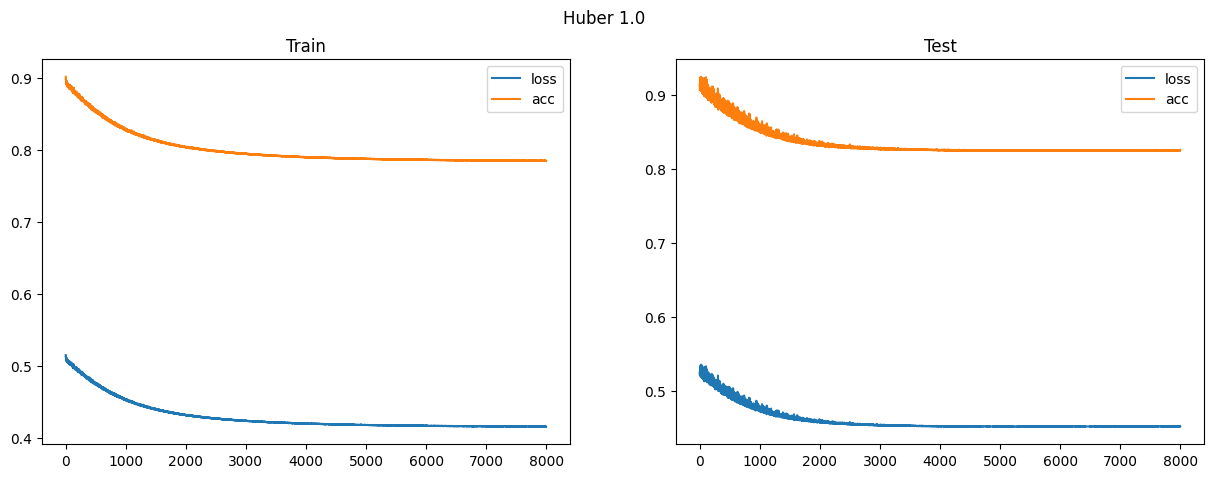

In [83]:
model = VariationalAutoencoder(2)
criterion = nn.HuberLoss(delta=1.0)
optimiser = torch.optim.Adam(model.parameters())

train_loss, test_loss, train_acc, test_acc = training_loop(n_epochs = 8000,
              model = model,
              optimiser = optimiser,
              loss_fn = criterion,
              train_input = train_input,
              test_input = test_input)

print(train_loss[-1], test_loss[-1], train_acc[-1], test_acc[-1])
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(train_loss, label='loss')
axs[0].plot(train_acc, label='acc')
axs[0].set_title('Train')
axs[0].legend()
axs[1].plot(test_loss, label='loss')
axs[1].plot(test_acc, label='acc')
axs[1].set_title('Test')
axs[1].legend()
fig.suptitle("Huber 1.0")
plt.show()

0.5677928924560547 0.6109177470207214 0.7826349139213562 0.8272174596786499


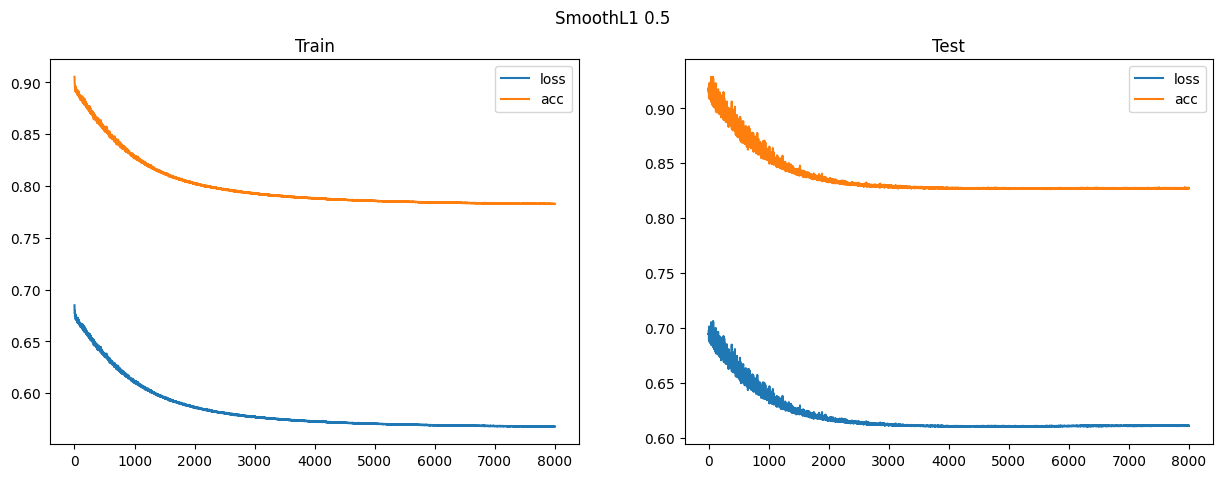

In [84]:
model = VariationalAutoencoder(2)
criterion = nn.SmoothL1Loss(beta=0.5)
optimiser = torch.optim.Adam(model.parameters())

train_loss, test_loss, train_acc, test_acc = training_loop(n_epochs = 8000,
              model = model,
              optimiser = optimiser,
              loss_fn = criterion,
              train_input = train_input,
              test_input = test_input)

print(train_loss[-1], test_loss[-1], train_acc[-1], test_acc[-1])
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(train_loss, label='loss')
axs[0].plot(train_acc, label='acc')
axs[0].set_title('Train')
axs[0].legend()
axs[1].plot(test_loss, label='loss')
axs[1].plot(test_acc, label='acc')
axs[1].set_title('Test')
axs[1].legend()
fig.suptitle("SmoothL1 0.5")
plt.show()

0.4153616428375244 0.45136481523513794 0.7846066951751709 0.8248570561408997


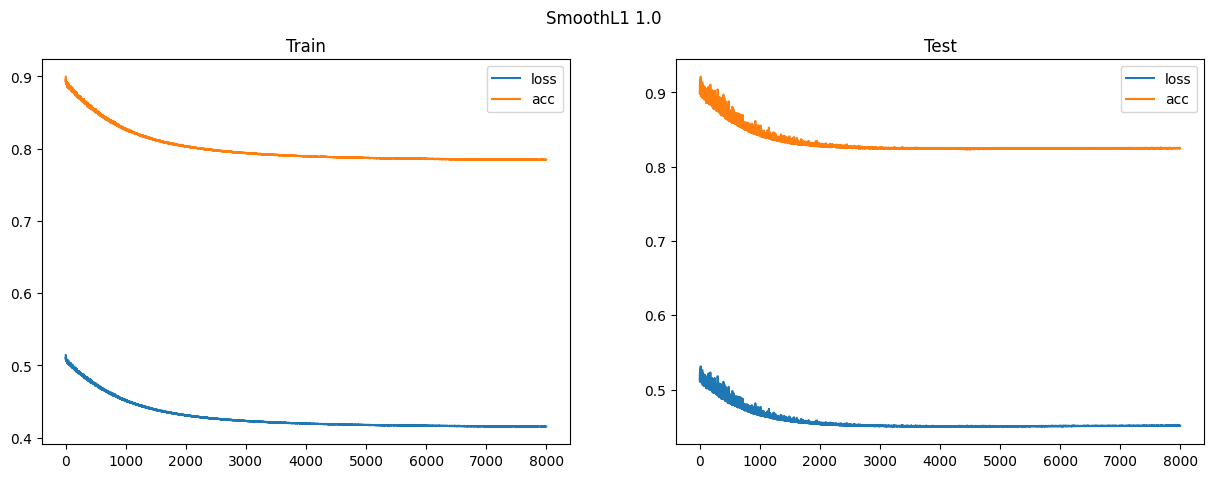

In [85]:
model = VariationalAutoencoder(2)
criterion = nn.SmoothL1Loss(beta=1.0)
optimiser = torch.optim.Adam(model.parameters())

train_loss, test_loss, train_acc, test_acc = training_loop(n_epochs = 8000,
              model = model,
              optimiser = optimiser,
              loss_fn = criterion,
              train_input = train_input,
              test_input = test_input)

print(train_loss[-1], test_loss[-1], train_acc[-1], test_acc[-1])
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(train_loss, label='loss')
axs[0].plot(train_acc, label='acc')
axs[0].set_title('Train')
axs[0].legend()
axs[1].plot(test_loss, label='loss')
axs[1].plot(test_acc, label='acc')
axs[1].set_title('Test')
axs[1].legend()
fig.suptitle("SmoothL1 1.0")
plt.show()

0.8560959100723267 0.9166213274002075 0.7819560766220093 0.8242473602294922


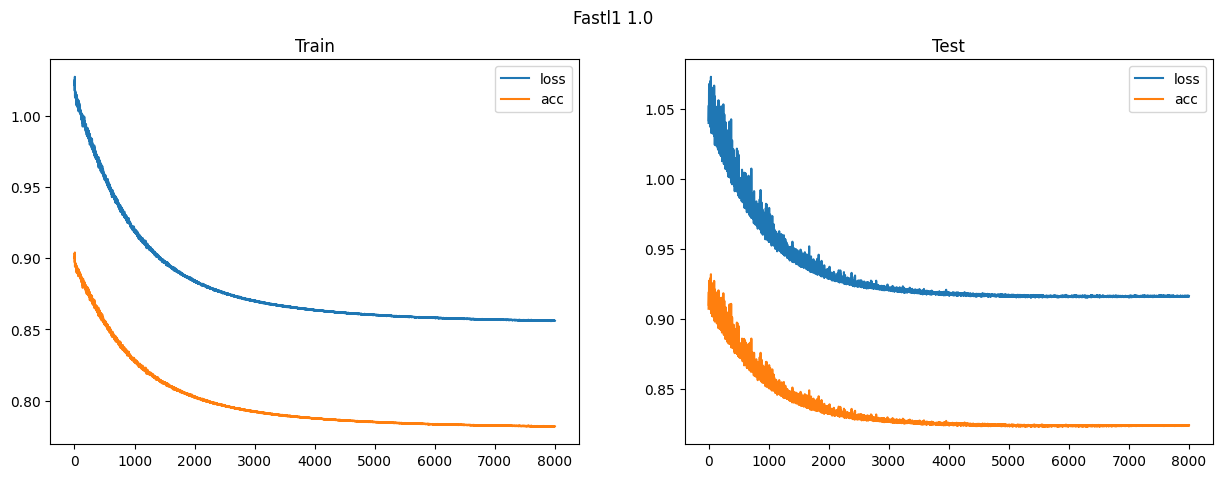

In [86]:
model = VariationalAutoencoder(2)
criterion = lambda pred, targ: torch.mean(torch.where(1.0 >= torch.abs(pred-targ), torch.abs(pred-targ), (pred-targ)**2/(2*1.0) + 1.0/2))
optimiser = torch.optim.Adam(model.parameters())

train_loss, test_loss, train_acc, test_acc = training_loop(n_epochs = 8000,
              model = model,
              optimiser = optimiser,
              loss_fn = criterion,
              train_input = train_input,
              test_input = test_input)

print(train_loss[-1], test_loss[-1], train_acc[-1], test_acc[-1])
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(train_loss, label='loss')
axs[0].plot(train_acc, label='acc')
axs[0].set_title('Train')
axs[0].legend()
axs[1].plot(test_loss, label='loss')
axs[1].plot(test_acc, label='acc')
axs[1].set_title('Test')
axs[1].legend()
fig.suptitle("Fastl1 1.0")
plt.show()

0.7814574241638184 0.8296801447868347 0.7813793420791626 0.8293816447257996


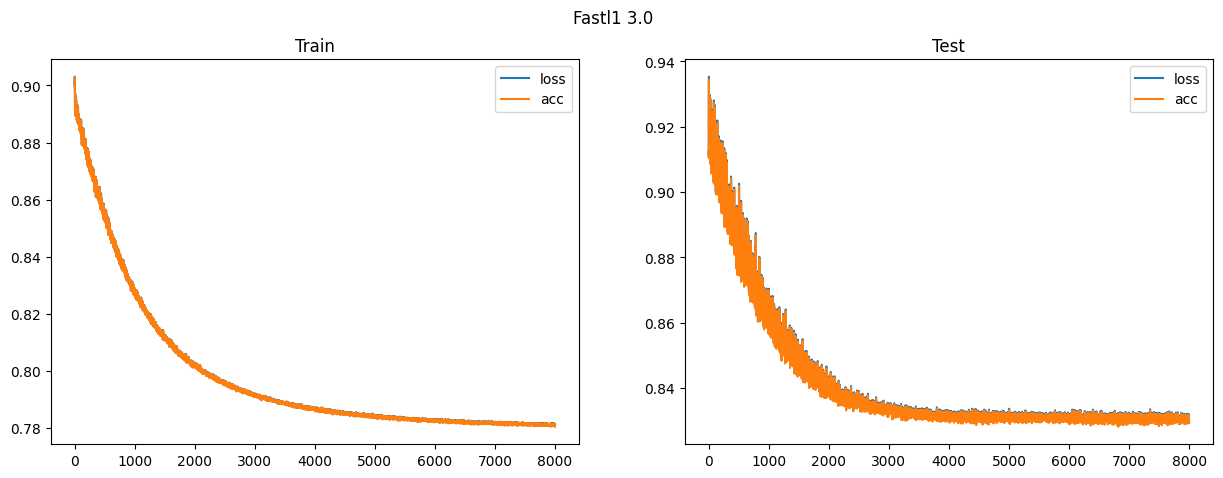

In [87]:
model = VariationalAutoencoder(2)
criterion = lambda pred, targ: torch.mean(torch.where(3.0 >= torch.abs(pred-targ), torch.abs(pred-targ), (pred-targ)**2/(2*3.0) + 3.0/2))
optimiser = torch.optim.Adam(model.parameters())

train_loss, test_loss, train_acc, test_acc = training_loop(n_epochs = 8000,
              model = model,
              optimiser = optimiser,
              loss_fn = criterion,
              train_input = train_input,
              test_input = test_input)

print(train_loss[-1], test_loss[-1], train_acc[-1], test_acc[-1])
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(train_loss, label='loss')
axs[0].plot(train_acc, label='acc')
axs[0].set_title('Train')
axs[0].legend()
axs[1].plot(test_loss, label='loss')
axs[1].plot(test_acc, label='acc')
axs[1].set_title('Test')
axs[1].legend()
fig.suptitle("Fastl1 3.0")
plt.show()

0.7806624174118042 0.8319870233535767 0.7806624174118042 0.8319870233535767


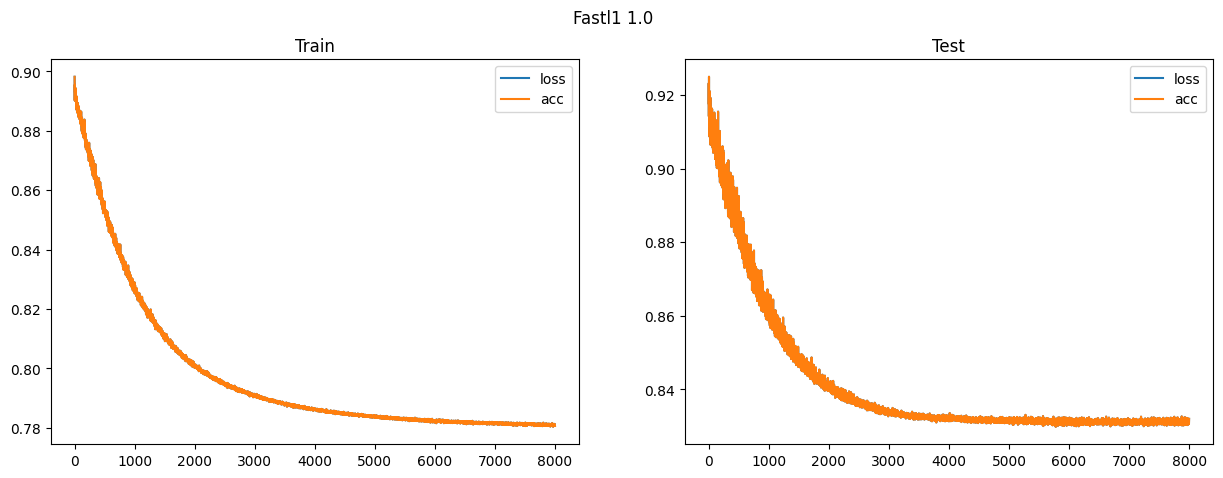

In [88]:
model = VariationalAutoencoder(2)
criterion = lambda pred, targ: torch.mean(torch.where(5.0 >= torch.abs(pred-targ), torch.abs(pred-targ), (pred-targ)**2/(2*5.0) + 5.0/2))
optimiser = torch.optim.Adam(model.parameters())

train_loss, test_loss, train_acc, test_acc = training_loop(n_epochs = 8000,
              model = model,
              optimiser = optimiser,
              loss_fn = criterion,
              train_input = train_input,
              test_input = test_input)

print(train_loss[-1], test_loss[-1], train_acc[-1], test_acc[-1])
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(train_loss, label='loss')
axs[0].plot(train_acc, label='acc')
axs[0].set_title('Train')
axs[0].legend()
axs[1].plot(test_loss, label='loss')
axs[1].plot(test_acc, label='acc')
axs[1].set_title('Test')
axs[1].legend()
fig.suptitle("Fastl1 1.0")
plt.show()

## Comparison for reconstruction on images

In [80]:
import torchvision

In [81]:
class Decoder(nn.Module):
    def __init__(self, latent_dims):
        super(Decoder, self).__init__()
        self.linear1 = nn.Linear(latent_dims, 512)
        self.linear2 = nn.Linear(512, 784)

    def forward(self, z):
        z = nn.functional.relu(self.linear1(z))
        z = torch.sigmoid(self.linear2(z))
        return z.reshape((-1, 1, 28, 28))

In [82]:
class VariationalEncoder(nn.Module):
    def __init__(self, latent_dims):
        super(VariationalEncoder, self).__init__()
        self.linear1 = nn.Linear(784, 512)
        self.linear2 = nn.Linear(512, latent_dims)
        self.linear3 = nn.Linear(512, latent_dims)

        self.N = torch.distributions.Normal(0, 1)
        self.kl = 0

    def forward(self, x):
        x = torch.flatten(x, start_dim=1)
        x = nn.functional.relu(self.linear1(x))
        mu =  self.linear2(x)
        sigma = torch.exp(self.linear3(x))
        z = mu + sigma*self.N.sample(mu.shape)
        self.kl = (sigma**2 + mu**2 - torch.log(sigma) - 1/2).sum()
        return z

In [83]:
class VariationalAutoencoder(nn.Module):
    def __init__(self, latent_dims):
        super(VariationalAutoencoder, self).__init__()
        self.encoder = VariationalEncoder(latent_dims)
        self.decoder = Decoder(latent_dims)

    def forward(self, x):
        z = self.encoder(x)
        return self.decoder(z)

In [84]:
def training_loop(n_epochs, model, optimiser, loss_fn,
                  train_input, test_input):
    train_loss = []
    test_loss = []
    train_acc = []
    test_acc = []
    for i in range(n_epochs):
        for x, y in train_input:
            optimiser.zero_grad()
            out = model(x)
            loss = loss_fn(out, x) + model.encoder.kl
            loss.backward()
            optimiser.step()
        with torch.no_grad():
            losses = []
            acces = []
            for x, y in test_input:
                out = model(x)
                loss = loss_fn(out, x)
                losses.append(loss.item())
                acces.append(torch.mean(torch.abs(out-x)).item())
            test_loss.append(np.mean(losses))
            test_acc.append(np.mean(acces))
            # print the loss
            for x, y in train_input:
                out = model(x)
                loss = loss_fn(out, x)
                losses.append(loss.item())
                acces.append(torch.mean(torch.abs(out-x)).item())
            train_loss.append(np.mean(losses))
            train_acc.append(np.mean(acces))
            
    return train_loss, test_loss, train_acc, test_acc

In [85]:
latent_dims = 2
path = "../../datasets"

dataset_train = torchvision.datasets.MNIST(path, train=True, transform=torchvision.transforms.ToTensor(), download=True)
dataset_test = torchvision.datasets.MNIST(path, train=False, transform=torchvision.transforms.ToTensor(), download=True)

modes = {}

In [86]:
model = VariationalAutoencoder(latent_dims)
criterion = lambda pred, targ: torch.mean((pred - targ)**2)
optimiser = torch.optim.Adam(model.parameters())

g = torch.Generator()
g.manual_seed(0)
data_train = torch.utils.data.DataLoader(dataset_train, batch_size=128, shuffle=True, generator=g)
data_test = torch.utils.data.DataLoader(dataset_test, batch_size=128, shuffle=False, generator=g)

train_loss, test_loss, train_acc, test_acc = training_loop(n_epochs = 5000,
              model = model,
              optimiser = optimiser,
              loss_fn = criterion,
              train_input = data_train,
              test_input = data_test)

modes['MSE'] = model
print(train_loss[-1], test_loss[-1], train_acc[-1], test_acc[-1])
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(train_loss, label='loss')
axs[0].plot(train_acc, label='acc')
axs[0].set_title('Train')
axs[0].legend()
axs[1].plot(test_loss, label='loss')
axs[1].plot(test_acc, label='acc')
axs[1].set_title('Test')
axs[1].legend()
fig.suptitle("MSE")
plt.show()